In [1]:
!pip install spacy


# **OpenPose Installation**

In [ ]:
# 最初に、ランタイムの種類を「GPU」に変更してください。（ランタイム＞ランタイムのタイプを変更）
# GPUが有効になっていることを確認します。

# First, change the runtime type to "GPU".
# Confirm runtime to GPU
! nvcc --version
! nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Wed Mar 27 06:40:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  7

In [ ]:
# Openpose バージョン指定タグ
# Openpose version tag
ver_openpose = "v1.6.0"

In [ ]:
# CMakeが古いとOpenpose（CUDA10)が失敗するので、バージョンを確認します。
# If CMake is old, Openpose build fails, so download the latest version
! cmake --version

cmake version 3.27.9

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [ ]:
pwd


'/content'

In [ ]:
# 2020.05.20時点の最新CMakeを再ビルド（15分くらい）
! wget -c "https://github.com/Kitware/CMake/releases/download/v3.17.2/cmake-3.17.2.tar.gz"
! tar xf cmake-3.17.2.tar.gz
! cd cmake-3.17.2 && ./configure && make && sudo make install

Streaming output truncated to the last 5000 lines.
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, char *, unsigned int, int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, char *, unsigned int, unsigned int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, void *, int, int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, void *, int, unsigned int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, void *, size_t, int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: int recv(SOCKET, void *, size_t, unsigned int)
-- Performing Test curl_cv_func_recv_test
-- Performing Test curl_cv_func_recv_test - Failed
-- Tested: in

In [ ]:
# ライブラリインストール
# Install library

# Basic
! sudo apt-get --assume-yes install build-essential
# OpenCV
! sudo apt-get --assume-yes install libopencv-dev
# General dependencies
! sudo apt-get --assume-yes install libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler
! sudo apt-get --assume-yes install --no-install-recommends libboost-all-dev
# Remaining dependencies, 14.04
! sudo apt-get --assume-yes install libgflags-dev libgoogle-glog-dev liblmdb-dev
# Python3 libs
! sudo apt-get --assume-yes install python3-setuptools python3-dev build-essential
! sudo apt-get --assume-yes install python3-pip
! sudo -H pip3 install --upgrade numpy protobuf opencv-python
# OpenCL Generic
! sudo apt-get --assume-yes install opencl-headers ocl-icd-opencl-dev
! sudo apt-get --assume-yes install libviennacl-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
The following additional packages will be installed:
  libleveldb1d libprotobuf-lite23
Suggested packages:
  leveldb-doc
The following NEW packages will be installed:
  libl

In [ ]:
# Openposeのコードをclone
# Clone Openpose
# ! git clone  --depth 1 -b "$ver_openpose" https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
! git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git

Cloning into 'openpose'...
remote: Enumerating objects: 16131, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 16131 (delta 20), reused 35 (delta 12), pack-reused 16084
Receiving objects: 100% (16131/16131), 84.46 MiB | 21.10 MiB/s, done.
Resolving deltas: 100% (11298/11298), done.
Updating files: 100% (582/582), done.


In [ ]:
# build用ディレクトリを作成
# Create build directory
! cd openpose && mkdir build && cd build

In [ ]:
# https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/installation.md#cmake-command-line-configuration-ubuntu-only
# 上記インストール手順のシナリオ１でインストール実行
# Scenario 1 - Caffe not installed and OpenCV installed using apt-get
! cd /content/openpose/build && cmake ..

# COCOモデルのDLオプション付き(「# ! cd」の部分を「! cd」に変更してください。)
# If you want to download the COCO model as well, execute the following command. (Please change "# ! cd" part to "! cd".)
# ! cd openpose/build && cmake .. -D DOWNLOAD_BODY_COCO_MODEL=ON

# MPIモデルのDLオプション付き（同上）
# If you want to download the MPI model as well, execute the following command.
#! cd openpose/build && cmake .. -D DOWNLOAD_BODY_MPI_MODEL=ON

-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Building with CUDA.
-- CUDA detected: 12.2
-- Found cuDNN: ver. 8.9.6 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Added CUDA NVCC flags for: sm_75
-- Found cuDNN: ver. 8.9.6 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Caffe will be downloaded from source now. NOTE: This process might take several minutes depending
        on your internet connection.
-- Caffe has already been downloaded.
HEAD is now at 1807aada Added Ampere arch's (CUDA11)
-- Caffe will be built from source now.
-- Download the models.
-- Downloading BODY_25 model...
-- Model already exists.
-- Not downloading body (COCO) model
-- Not downloading body (MPI) model
-- Downloading face model...
--

In [ ]:
import os
# Define the path to the model file
model_path = '/content/openpose/models/pose/body_25/pose_iter_584000.caffemodel'

# Define the URL of the model file
model_url = 'http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/body_25/pose_iter_584000.caffemodel'

# Download the model file only if it's not already present or if the file is empty
if not os.path.exists(model_path) or os.path.getsize(model_path) == 0:
    !wget -c '{model_url}' -O '{model_path}'
else:
    print('Model file already exists and is not empty.')

# Verify the MD5 hash of the downloaded file
!md5sum '{model_path}'


Model file already exists and is not empty.
78287b57cf85fa89c03f1393d368e5b7  /content/openpose/models/pose/body_25/pose_iter_584000.caffemodel


In [ ]:
 !curl --header "Host: doc-0c-9c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header "Referer: https://drive.google.com/" --header "Cookie: AUTH_vjbd4i74vlvi1hegbf3o9diejm7shfc9_nonce=8nck108fj5cog" --header "Connection: keep-alive" "https://doc-0c-9c-docs.googleusercontent.com/docs/securesc/3skmo76390f753amueq2i8vpf4m36vbu/33rb4sgimolvkp8csmtqfsird1askaop/1622031900000/01999283555521790548/08988568280628359966/1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh?e=download&authuser=0&nonce=8nck108fj5cog&user=08988568280628359966&hash=n04mqs21t8o9elu5lpeheasognm8dbq3" -L -o "models.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [ ]:
# Openposeのビルド（15分くらい）
# Openpose Building
! cd /content/openpose/build && make -j`nproc`

Scanning dependencies of target openpose_lib
[ 12%] Creating directories for 'openpose_lib'
[ 25%] No download step for 'openpose_lib'
[ 37%] No patch step for 'openpose_lib'
[ 50%] No update step for 'openpose_lib'
[ 62%] Performing configure step for 'openpose_lib'
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at cmake/Misc.cmake:32 (set):
  implicitly converting 'BOOLEAN' to 'STRING' type.
Call Stack (most recent call first):

# Openpose

In [ ]:
! chmod a+x /content/openpose/build/examples/openpose/openpose.bin

In [ ]:
cd /content/openpose

/content/openpose


In [ ]:
! ./build/examples/openpose/openpose.bin \
    --face \
    --hand \
    --num_gpu 1 \
    --num_gpu_start 0 \
    --display 0 \
    --render_pose 0 \
    --image_dir custom-input-image/ \
    --write_json custom-image-json-output/

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...

Error:
Folder custom-input-image/ does not exist.

Coming from:
- /content/openpose/src/openpose/utilities/fileSystem.cpp:getFilesOnDirectory():325
- /content/openpose/src/openpose/utilities/fileSystem.cpp:getFilesOnDirectory():379
- /content/openpose/src/openpose/utilities/fileSystem.cpp:getFilesOnDirectory():421
- /content/openpose/src/openpose/producer/imageDirectoryReader.cpp:getImagePathsOnDirectory():23
- /content/openpose/src/openpose/producer/producer.cpp:createProducer():475
- /content/openpose/include/openpose/wrapper/wrapperAuxiliary.hpp:configureThreadManager():1221
- /content/openpose/include/openpose/wrapper/wrapper.hpp:exec():424


In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source path (Google Drive folder you want to copy) and the destination path (new folder in /content)
source_folder = '/content/drive/MyDrive/ControlNetImages'  # Adjust this path
destination_folder = '/content/Output'  # Adjust this folder name as needed

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the entire folder from Google Drive to the new folder in /content
for item in os.listdir(source_folder):
    s = os.path.join(source_folder, item)
    d = os.path.join(destination_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)

print(f"Folder '{source_folder}' has been copied to '{destination_folder}'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder '/content/drive/MyDrive/ControlNetImages' has been copied to '/content/Output'


OpenPose trial code

In [ ]:
import os
from google.colab import files
from IPython.display import Image as IPImage

# Upload an image (or you can skip this step if you already have an image in Colab)
#uploaded = files.upload()
image_path = "/content/Output/image_1.jpg"  # Get the name of the uploaded image

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Run OpenPose on the uploaded image
# Adjust the parameters as needed
output_folder = "/content/drive/MyDrive/FinalControlNetImage"
os.makedirs(output_folder, exist_ok=True)  # Create output directory
!cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir /content/ --write_json {output_folder} --display 0 --write_images {output_folder}

# Display an example of the output
output_image = os.path.join(output_folder, os.path.basename("running_rendered.png"))



Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...

Error:
No images were found on /content/

Coming from:
- /content/openpose/src/openpose/producer/imageDirectoryReader.cpp:getImagePathsOnDirectory():17
- /content/openpose/src/openpose/producer/imageDirectoryReader.cpp:getImagePathsOnDirectory():23
- /content/openpose/src/openpose/producer/producer.cpp:createProducer():475
- /content/openpose/include/openpose/wrapper/wrapperAuxiliary.hpp:configureThreadManager():1221
- /content/openpose/include/openpose/wrapper/wrapper.hpp:exec():424


Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 4.495591 seconds.


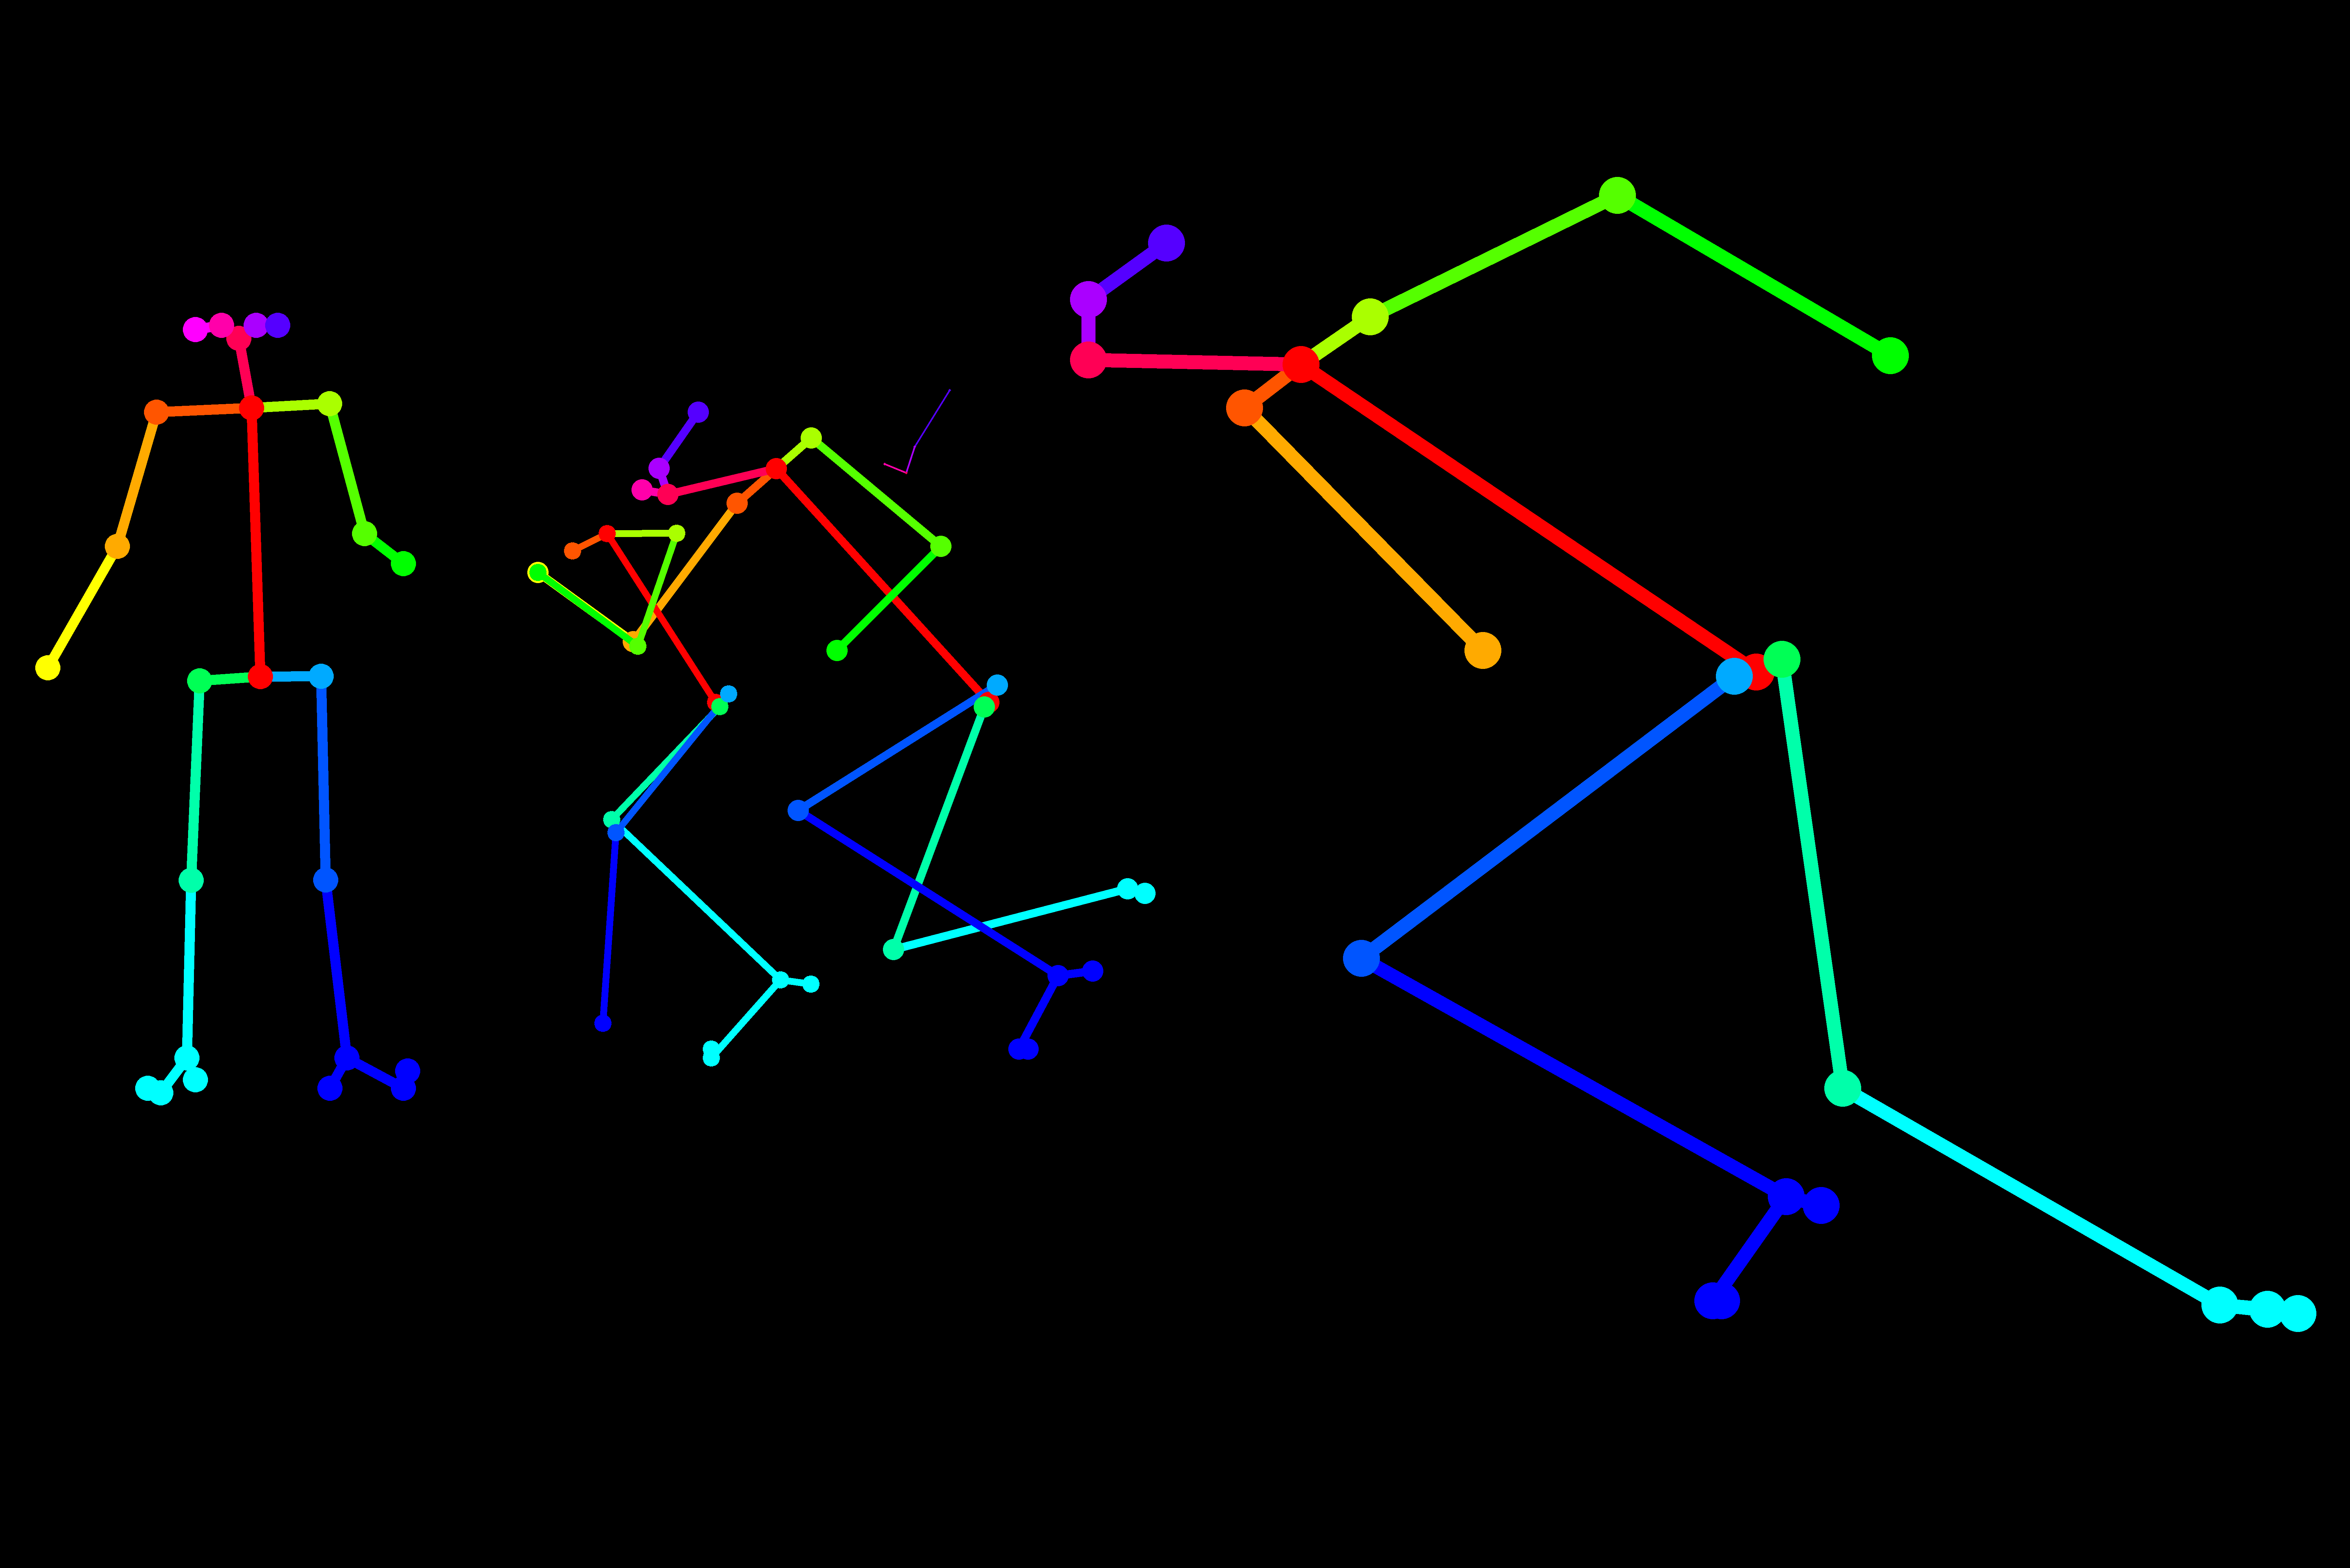

In [ ]:
import os
from google.colab import files
from IPython.display import Image as IPImage

# Upload an image (or use a pre-existing one)
#uploaded = files.upload()
image_path = "/content/new_best_image.png"  # Get the name of the uploaded image

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Run OpenPose on the uploaded image
# Adjust the parameters as needed
output_folder = "/content"
os.makedirs(output_folder, exist_ok=True)  # Create output directory
!cd /content/openpose && ./build/examples/openpose/openpose.bin \
    --image_dir /content/ \
    --render_pose 1 \
    --disable_blending \
    --display 0 \
    --write_images {output_folder} \
    --write_json {output_folder}

# Display the output
output_image = os.path.join(output_folder, os.path.basename("new_best_image_rendered.png"))
display(IPImage(filename=output_image))

In [ ]:
import os
from IPython.display import Image as IPImage

# Define the path to the folder containing your images
images_folder = "/content/Output"  # Update this to your images folder path

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Define the output folder for JSON and rendered images
output_folder = "/content/Final"
os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist

# Run OpenPose on the images in the specified folder
!cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir {images_folder} --write_json {output_folder} --display 0 --write_images {output_folder}

# If you want to display an example of the output, specify one of the output files
# This is optional and just for demonstration purposes



Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 414.070751 seconds.


FileNotFoundError: [Errno 2] No such file or directory: '/content/Final iimage/example_rendered.png'

In [ ]:
import os
import json
import shutil

input_folder = '/content/Final'  # Change this to your OpenPose output folder path
best_image_folder = '/content/best_image'  # Change this to your desired output path for the best image
os.makedirs(best_image_folder, exist_ok=True)

def score_image(json_path):
    """Scores an image based on keypoints and their confidence scores."""
    with open(json_path, 'r') as f:
        data = json.load(f)

    score = 0
    for person in data['people']:
        keypoints = person['pose_keypoints_2d']
        confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
        score += sum(confidence_scores)  # Sum of confidence scores as the score
    return score

# Scoring images
scores = {}
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        json_path = os.path.join(input_folder, filename)
        scores[filename] = score_image(json_path)

# Identifying the best-scored image
best_image_json = max(scores, key=scores.get)
best_image_base = os.path.splitext(best_image_json)[0]

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Saving the best image in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")


Best image 'pexels-photo-1056497_rendered.png' saved in '/content/best_image'


In [ ]:
print(scores)

{'image_9_keypoints.json': 16.88247, 'pexels-photo-1416736_keypoints.json': 19.592250000000003, 'pexels-photo-1056497_keypoints.json': 32.70303669999999, 'pexels-photo-1390403_keypoints.json': 17.358850999999994, 'image_0_keypoints.json': 14.878216, 'image_4_keypoints.json': 4.2338819999999995, 'image_6_keypoints.json': 17.915750100000004, 'image_3_keypoints.json': 0, 'image_2_keypoints.json': 12.418634999999997, 'image_8_keypoints.json': 16.559186000000004, 'image_7_keypoints.json': 8.899249999999999, 'image_1_keypoints.json': 19.795231000000005, 'pexels-photo-936075_keypoints.json': 15.865210000000003, 'image_5_keypoints.json': 9.634141000000001}


In [ ]:
prompts

[]

In [2]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install transformers


In [4]:
pip install pattern


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.8/348.8 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=d8f2575f33d03602c52d450e4c2e3e3d01b15390fa543ad049a7373f572c6071
  Stored in dire

In [5]:
!pip install transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def is_passive(sentence):
    doc = nlp(sentence)
    passive = False
    for token in doc:
        # Check if there's a token that is a passive subject
        if token.dep_ == 'nsubjpass':
            passive = True
    return passive

# Example sentences
sentences = [
    "The cake was eaten by the dog.",
    "The dog ate the cake."
]

# Check each sentence
for sentence in sentences:
    if is_passive(sentence):
        print(f"Passive voice detected: {sentence}")
    else:
        print(f"Active voice detected: {sentence}")


Passive voice detected: The cake was eaten by the dog.
Active voice detected: The dog ate the cake.


In [ ]:
import spacy
from pattern.en import conjugate, INFINITIVE, PRESENT, PARTICIPLE

nlp = spacy.load("en_core_web_sm")

def convert_verb_to_present_continuous(verb):
    return conjugate(verb, tense=PRESENT, aspect=PARTICIPLE)

def passive_to_active(sentence):
    doc = nlp(sentence)

    subject = None
    verb = None
    object = None
    is_passive = False

    for token in doc:
        if token.dep_ == 'nsubjpass':
            object = token.text
        elif token.dep_ == 'auxpass':
            is_passive = True
        elif token.dep_ == 'ROOT':
            verb = token.text
        elif token.dep_ == 'agent':
            # Extract the subject (agent) of the passive sentence
            subject = ' '.join([child.text for child in token.children if child.dep_ == 'pobj'])

    if subject and verb and object and is_passive:
        # Convert verb to present continuous tense
        verb_present_continuous = convert_verb_to_present_continuous(verb)
        return f"{subject} is {verb_present_continuous} {object}"
    else:
        return "Cannot convert to active voice or sentence is not passive."

# Example passive sentence
sentence = "Ball is being been thrown by Zeeshan"
active_sentence = passive_to_active(sentence)
print("Active Sentence:", active_sentence)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


RuntimeError: generator raised StopIteration

In [6]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=165337df6ebc1aecf594ef1592b9c5b7848d9b1c322214223c38c127f5ef034e
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [1]:
import anvil.server

anvil.server.connect("server_XUIZ36OBU2RJOLY75ZHPWV7U-5G5MEK7R7BNYGM2X")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:

@anvil.server.callable
def image_gen(user_prompt):
  prompts=user_prompt
  return prompts


In [ ]:
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Asking for user input
ethnicities_list = ["kyrgyz", "maasai", "newar", "altai", "bengali", "haitian", "hazara", "kiche", "lahu",
                    "mizrahi", "quechua", "xhosa", "cree", "sami", "inuit", "walpiri", "maori", "basque",
                    "mazigh", "najdi","kalash"]
lora_dictionary={"kyrgyz":"kyrgyz.safetensors", "maasai":"Masaai test Lora.safetensors", "newar":"Newar.safetensors", "altai":0, "bengali":0, "haitian":0, "hazara":0, "kiche":0, "lahu":"last.safetensors",
                    "mizrahi":0, "quechua":0, "xhosa":0, "cree":0, "sami":"Sami.safetensors", "inuit":0, "walpiri":0, "maori":0, "basque":0,
                    "mazigh":0, "najdi":0,"kalash":"Kalash_women_cluster2.safetensors"}
user_prompt = input("Please enter your text prompt: ")
#prompts= user_prompt
updated_sentences=[]
lora_list=[]
# Process the text
doc = nlp(user_prompt)
def is_passive(sentence):
    doc = nlp(sentence)
    passive = False
    for token in doc:
        # Check if there's a token that is a passive subject
        if token.dep_ == 'nsubjpass':
            passive = True
    return passive
def process_text(text):
    doc = nlp(text)
    updated_sentences = []
    for sent in doc.sents:
        print(f"Sentence: {sent.text}")
        if is_passive(sent.text):
          updated_sentence = passive_to_active(sent.text)
          updated_sentences.append(updated_sentence)
        else:
          updated_sentence = sent.text
          updated_sentences.append(updated_sentence)
        for token in sent:
          if str(token).lower() in ethnicities_list:
              print(token)
              lora_list.append(token)
    updated_doc = nlp(" ".join(updated_sentences))

    return updated_doc
# POS tagging and identifying subjects, verbs, and objects
processed_doc = process_text(user_prompt)
for sent in processed_doc.sents:
    print(f"Sentence: {sent.text}")
    subjects, verbs, objects = [], [], []
    for token in sent:
        print(f"{token.text:10} {token.pos_:10}")

        if "subj" in token.dep_:
            subjects.append(token.text)
        if token.pos_ == "VERB":
            verbs.append(token.text)

        if "obj" in token.dep_:
            objects.append(token.text)
    print("Subjects:", subjects)
    print("Verbs:", verbs)
    print("Objects:", objects)
    print("\n")
    print("Lora:",lora_list)


KeyboardInterrupt: Interrupted by user

In [ ]:
lora_dictionary[lora_list[0].lower()]

TypeError: 'int' object is not callable

In [ ]:
str(lora_list[0]).lower()

'maasai'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Downloading the images from internet**

In [ ]:
import requests
import json

# Replace 'Your_API_Key' with your actual Pixabay API key
API_KEY = '42825189-659d2e470c25fe20af6678a1c'
SEARCH_TERM = 'person '+verbs[0]

def search_pixabay_images(query, api_key, per_page=5):
    url = f"https://pixabay.com/api/?key={api_key}&q={query}&image_type=photo&per_page={per_page}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Search for images
result = search_pixabay_images(SEARCH_TERM, API_KEY)

# Print results
if result:
    for image in result.get('hits', []):
        print(image['webformatURL'])
else:
    print("No results found or error in request")


https://pixabay.com/get/g5a41bcc1b823557c62c5d0ffcd4cc470e9758aa4bd0f63d33ac674136d1c1ce8da9a5759f7d312496f5112eac701fa35_640.jpg
https://pixabay.com/get/g1b2788460d8534ba05b69462ca5b806d0e8f723ae8e5a966872fa05ab16db67dad36697762e93b5df15a8d941bdf00d7_640.jpg
https://pixabay.com/get/g90ae001fdb178776f097fdef6f66ae0383a916e5a417b942116dc2a57aa52c17f5aae1969f47389101774c84f8c9798096b5b717f327c6f80956f2b54a637ab3_640.jpg
https://pixabay.com/get/gd69ee298c75f28216d55c07c00c6c794b3b0596842cd8e31ccdcaebc62426068ab9a481f2cd828629b4bf7aa53faabe06b3f16389d64d90bdde9dc00be7ad2b0_640.jpg
https://pixabay.com/get/g35f64c0ff1407a0aa530a11dd9e6b1933db9ecbcd12c274f2361169e55ed86e02f34e964aadec2334fd46d8a78cdbe17663b40afbb48c255503ab663794203b1_640.jpg


In [ ]:
import requests
import os

def download_and_save_image(url, folder_path, image_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(folder_path, image_name), 'wb') as file:
            file.write(response.content)
    else:
        print(f"Failed to download {url}")

# Define the folder path in Google Drive
drive_folder_path = '/content/drive/MyDrive/ControlNetImages'  # Change to your path
os.makedirs(drive_folder_path, exist_ok=True)

# Download and save each image
if result:
    for index, image in enumerate(result.get('hits', [])):
        image_url = image['webformatURL']
        image_name = f"image_{index}.jpg"  # Image names like image_0.jpg, image_1.jpg, etc.
        download_and_save_image(image_url, drive_folder_path, image_name)
else:
    print("No results found or error in request")


person running


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import os

def get_pexels_images(api_key, query, per_page=10):
    headers = {'Authorization': api_key}
    params = {'query': query, 'per_page': per_page}
    response = requests.get('https://api.pexels.com/v1/search', headers=headers, params=params)
    return response.json()

def download_image(url, folder="/content/drive/MyDrive/ControlNetImages"):
    if not os.path.exists(folder):
        os.makedirs(folder)

    response = requests.get(url)
    if response.status_code == 200:
        file_path = os.path.join(folder, url.split('/')[-1])
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_path}")

# Replace with your actual Pexels API key
API_KEY = 'JyAPn2giACsepLq3R7pmTli4WAJEPJtCQgAihHLzFAmAmAvnTwbelVvV'
SEARCH_QUERY = 'person '+ verbs[0]

images_data = get_pexels_images(API_KEY, SEARCH_QUERY)

for photo in images_data['photos']:
    download_image(photo['src']['original'])


Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-1390403.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-936075.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-1416736.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-1056497.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/spot-runs-start-la.jpg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-2803158.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-601177.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-1104007.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-1954524.jpeg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-5310782.jpeg


copying images to local folder

In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source path (Google Drive folder you want to copy) and the destination path (new folder in /content)
source_folder = '/content/drive/MyDrive/ControlNetImages'  # Adjust this path
destination_folder = '/content/Output'  # Adjust this folder name as needed

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the entire folder from Google Drive to the new folder in /content
for item in os.listdir(source_folder):
    s = os.path.join(source_folder, item)
    d = os.path.join(destination_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)

print(f"Folder '{source_folder}' has been copied to '{destination_folder}'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder '/content/drive/MyDrive/ControlNetImages' has been copied to '/content/Output'


openpose renderings for the download images

In [ ]:
import os
from IPython.display import Image as IPImage

# Define the path to the folder containing your images
images_folder = "/content/Output"  # Update this to your images folder path

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Define the output folder for JSON and rendered images
output_folder = "/content/Final"
os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist

# Run OpenPose on the images in the specified folder
!cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir {images_folder} --write_json {output_folder} --display 0 --write_images {output_folder}

# If you want to display an example of the output, specify one of the output files
# This is optional and just for demonstration purposes



Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 832.370412 seconds.


finding the best image using best score

In [ ]:
import os
import json
import shutil

input_folder = '/content/Final'  # Change this to your OpenPose output folder path
best_image_folder = '/content'  # Change this to your desired output path for the best image
os.makedirs(best_image_folder, exist_ok=True)

def score_image(json_path):
    """Scores an image based on keypoints and their confidence scores."""
    with open(json_path, 'r') as f:
        data = json.load(f)

    score = 0
    for person in data['people']:
        keypoints = person['pose_keypoints_2d']
        confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
        score += sum(confidence_scores)  # Sum of confidence scores as the score
    return score

# Scoring images
scores = {}
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        json_path = os.path.join(input_folder, filename)
        scores[filename] = score_image(json_path)

# Identifying the best-scored image
best_image_json = max(scores, key=scores.get)
best_image_base = os.path.splitext(best_image_json)[0]

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Saving the best image in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")



Best image 'spot-runs-start-la_rendered.png' saved in '/content'


In [ ]:
import os
import shutil

# Let's assume input_folder, best_image_base, and best_image_folder are defined earlier in your code

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Specify the new name for the file here
new_filename = "new_best_image.png"

# Saving the best image with the new name in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, new_filename))

print(f"Best image '{new_filename}' saved in '{best_image_folder}'")


Best image 'new_best_image.png' saved in '/content'


generating stick image for best image

In [ ]:
import os
from google.colab import files
from IPython.display import Image as IPImage

# Upload an image (or use a pre-existing one)
#uploaded = files.upload()
image_path = "/content/image_1_rendered (1).png"  # Get the name of the uploaded image

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Run OpenPose on the uploaded image
# Adjust the parameters as needed
output_folder = "/content/drive/MyDrive/ControlNetImages2"
os.makedirs(output_folder, exist_ok=True)  # Create output directory
!cd /content/openpose && ./build/examples/openpose/openpose.bin \
    --image_dir /content/ \
    --render_pose 1 \
    --disable_blending \
    --display 0 \
    --write_images {output_folder} \
    --write_json {output_folder}

# Display the output
output_image = os.path.join(output_folder, os.path.basename("image_1_rendered_rendered.png"))
display(IPImage(filename=output_image))

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 7.186480 seconds.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ControlNetImages2/image_1_rendered_rendered.png'

# **Deleting all the images from the controlnet folder**

In [ ]:
import os
import shutil

folder_path = '/content/Output'  # Replace with your folder path

if os.path.exists(folder_path):
    # List all files and directories in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Delete the file
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)  # Delete the directory
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')
else:
    print(f"The folder {folder_path} does not exist.")


In [ ]:
#This is an example that uses the websockets api to know when a prompt execution is done
#Once the prompt execution is done it downloads the images using the /history endpoint

import websocket #NOTE: websocket-client (https://github.com/websocket-client/websocket-client)
import uuid
import json
import urllib.request
import urllib.parse
import random

server_address = "127.0.0.1:34.91.162.155"
client_id = str(uuid.uuid4())

def queue_prompt(prompt):
    p = {"prompt": prompt, "client_id": client_id}
    data = json.dumps(p).encode('utf-8')
    req =  urllib.request.Request("http://{}/prompt".format(server_address), data=data)
    return json.loads(urllib.request.urlopen(req).read())

def get_image(filename, subfolder, folder_type):
    data = {"filename": filename, "subfolder": subfolder, "type": folder_type}
    url_values = urllib.parse.urlencode(data)
    with urllib.request.urlopen("http://{}/view?{}".format(server_address, url_values)) as response:
        return response.read()

def get_history(prompt_id):
    with urllib.request.urlopen("http://{}/history/{}".format(server_address, prompt_id)) as response:
        return json.loads(response.read())

def get_images(ws, prompt):
    prompt_id = queue_prompt(prompt)['prompt_id']
    output_images = {}
    while True:
        out = ws.recv()
        if isinstance(out, str):
            message = json.loads(out)
            if message['type'] == 'executing':
                data = message['data']
                if data['node'] is None and data['prompt_id'] == prompt_id:
                    break #Execution is done
        else:
            continue #previews are binary data

    history = get_history(prompt_id)[prompt_id]
    for o in history['outputs']:
        for node_id in history['outputs']:
            node_output = history['outputs'][node_id]
            if 'images' in node_output:
                images_output = []
                for image in node_output['images']:
                    image_data = get_image(image['filename'], image['subfolder'], image['type'])
                    images_output.append(image_data)
            output_images[node_id] = images_output

    return output_images

with open("2 loras workflow_api.json", "r", encoding = "utf-8") as f:
    workflow_data = f.read()

workflow = json.loads(workflow_data)

workflow["6"]["inputs"]["text"] = input("Please enter a prompt\n")
workflow["5"]["inputs"]["batch_size"] = int(input("Please enter a batch size\n"))
workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"

#set the seed for our KSampler node
workflow["3"]["inputs"]["seed"] = 76778899966

ws = websocket.WebSocket()
ws.connect("ws://{}/ws?clientId={}".format(server_address, client_id))
images = get_images(ws, workflow)

#Commented out code to display the output images:

for node_id in images:
    for image_data in images[node_id]:
        from PIL import Image
        import io
        image = Image.open(io.BytesIO(image_data))
        image.show()



Please enter a prompt
a girl is running
Please enter a batch size
1


ValueError: Port could not be cast to integer value as '34.91.162.155'

--- request header ---
DEBUG:websocket:--- request header ---
GET / HTTP/1.1
Upgrade: websocket
Host: modern-wombats-send.loca.lt
Origin: https://modern-wombats-send.loca.lt
Sec-WebSocket-Key: EGtkwSeGzrbC8WjejIxx/Q==
Sec-WebSocket-Version: 13
Connection: Upgrade


DEBUG:websocket:GET / HTTP/1.1
Upgrade: websocket
Host: modern-wombats-send.loca.lt
Origin: https://modern-wombats-send.loca.lt
Sec-WebSocket-Key: EGtkwSeGzrbC8WjejIxx/Q==
Sec-WebSocket-Version: 13
Connection: Upgrade


-----------------------
DEBUG:websocket:-----------------------
--- response header ---
DEBUG:websocket:--- response header ---
HTTP/1.1 200 OK
DEBUG:websocket:HTTP/1.1 200 OK
Accept-Ranges: bytes
DEBUG:websocket:Accept-Ranges: bytes
Content-Length: 1538
DEBUG:websocket:Content-Length: 1538
Content-Type: text/html
DEBUG:websocket:Content-Type: text/html
Date: Mon, 18 Mar 2024 23:21:11 GMT
DEBUG:websocket:Date: Mon, 18 Mar 2024 23:21:11 GMT
Etag: "17af5a3b2cece400-602"
DEBUG:websocket:Etag: "17af5a3b2cece400-6

Error:  Handshake status 200 OK -+-+- {'accept-ranges': 'bytes', 'content-length': '1538', 'content-type': 'text/html', 'date': 'Mon, 18 Mar 2024 23:21:11 GMT', 'etag': '"17af5a3b2cece400-602"', 'last-modified': 'Wed, 31 Jan 2024 06:19:54 GMT', 'server': 'Python/3.10 aiohttp/3.9.3'} -+-+- b'<!DOCTYPE html>\r\n<html lang="en">\r\n\t<head>\r\n\t\t<meta charset="UTF-8">\r\n\t\t<title>ComfyUI</title>\r\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no">\r\n\t\t<link rel="stylesheet" type="text/css" href="./lib/litegraph.css" />\r\n\t\t<link rel="stylesheet" type="text/css" href="./style.css" />\r\n\t\t<link rel="stylesheet" type="text/css" href="./user.css" />\r\n\t\t<script type="text/javascript" src="./lib/litegraph.core.js"></script>\r\n\t\t<script type="text/javascript" src="./lib/litegraph.extensions.js" defer></script>\r\n\t\t<script type="module">\r\n\t\t\timport { app } from "./scripts/app.js";\r\n\t\t\tawait app.setup();\r\n\t\t\twindow.ap

--- request header ---
DEBUG:websocket:--- request header ---
GET /ws?clientId=709b79c5-87fd-480c-91c1-8d070e6a622c HTTP/1.1
Upgrade: websocket
Host: modern-wombats-send.loca.lt
Origin: https://modern-wombats-send.loca.lt
Sec-WebSocket-Key: 4lbEx7jI62uu6vnss0nwhw==
Sec-WebSocket-Version: 13
Connection: Upgrade


DEBUG:websocket:GET /ws?clientId=709b79c5-87fd-480c-91c1-8d070e6a622c HTTP/1.1
Upgrade: websocket
Host: modern-wombats-send.loca.lt
Origin: https://modern-wombats-send.loca.lt
Sec-WebSocket-Key: 4lbEx7jI62uu6vnss0nwhw==
Sec-WebSocket-Version: 13
Connection: Upgrade


-----------------------
DEBUG:websocket:-----------------------
--- response header ---
DEBUG:websocket:--- response header ---
HTTP/1.1 101 Switching Protocols
DEBUG:websocket:HTTP/1.1 101 Switching Protocols
Connection: upgrade
DEBUG:websocket:Connection: upgrade
Date: Mon, 18 Mar 2024 23:21:12 GMT
DEBUG:websocket:Date: Mon, 18 Mar 2024 23:21:12 GMT
Sec-Websocket-Accept: kyrDQiotGAzmVNFLKZHtpFnvBUs=
DEBUG:websock

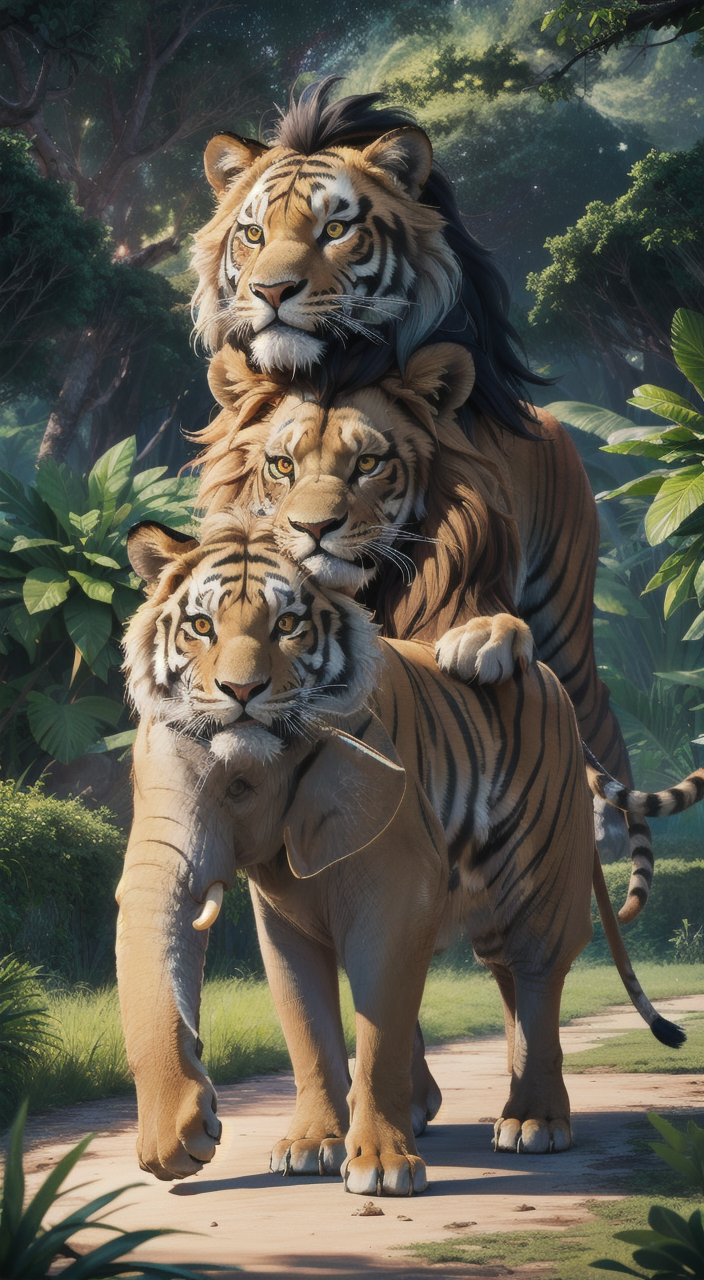

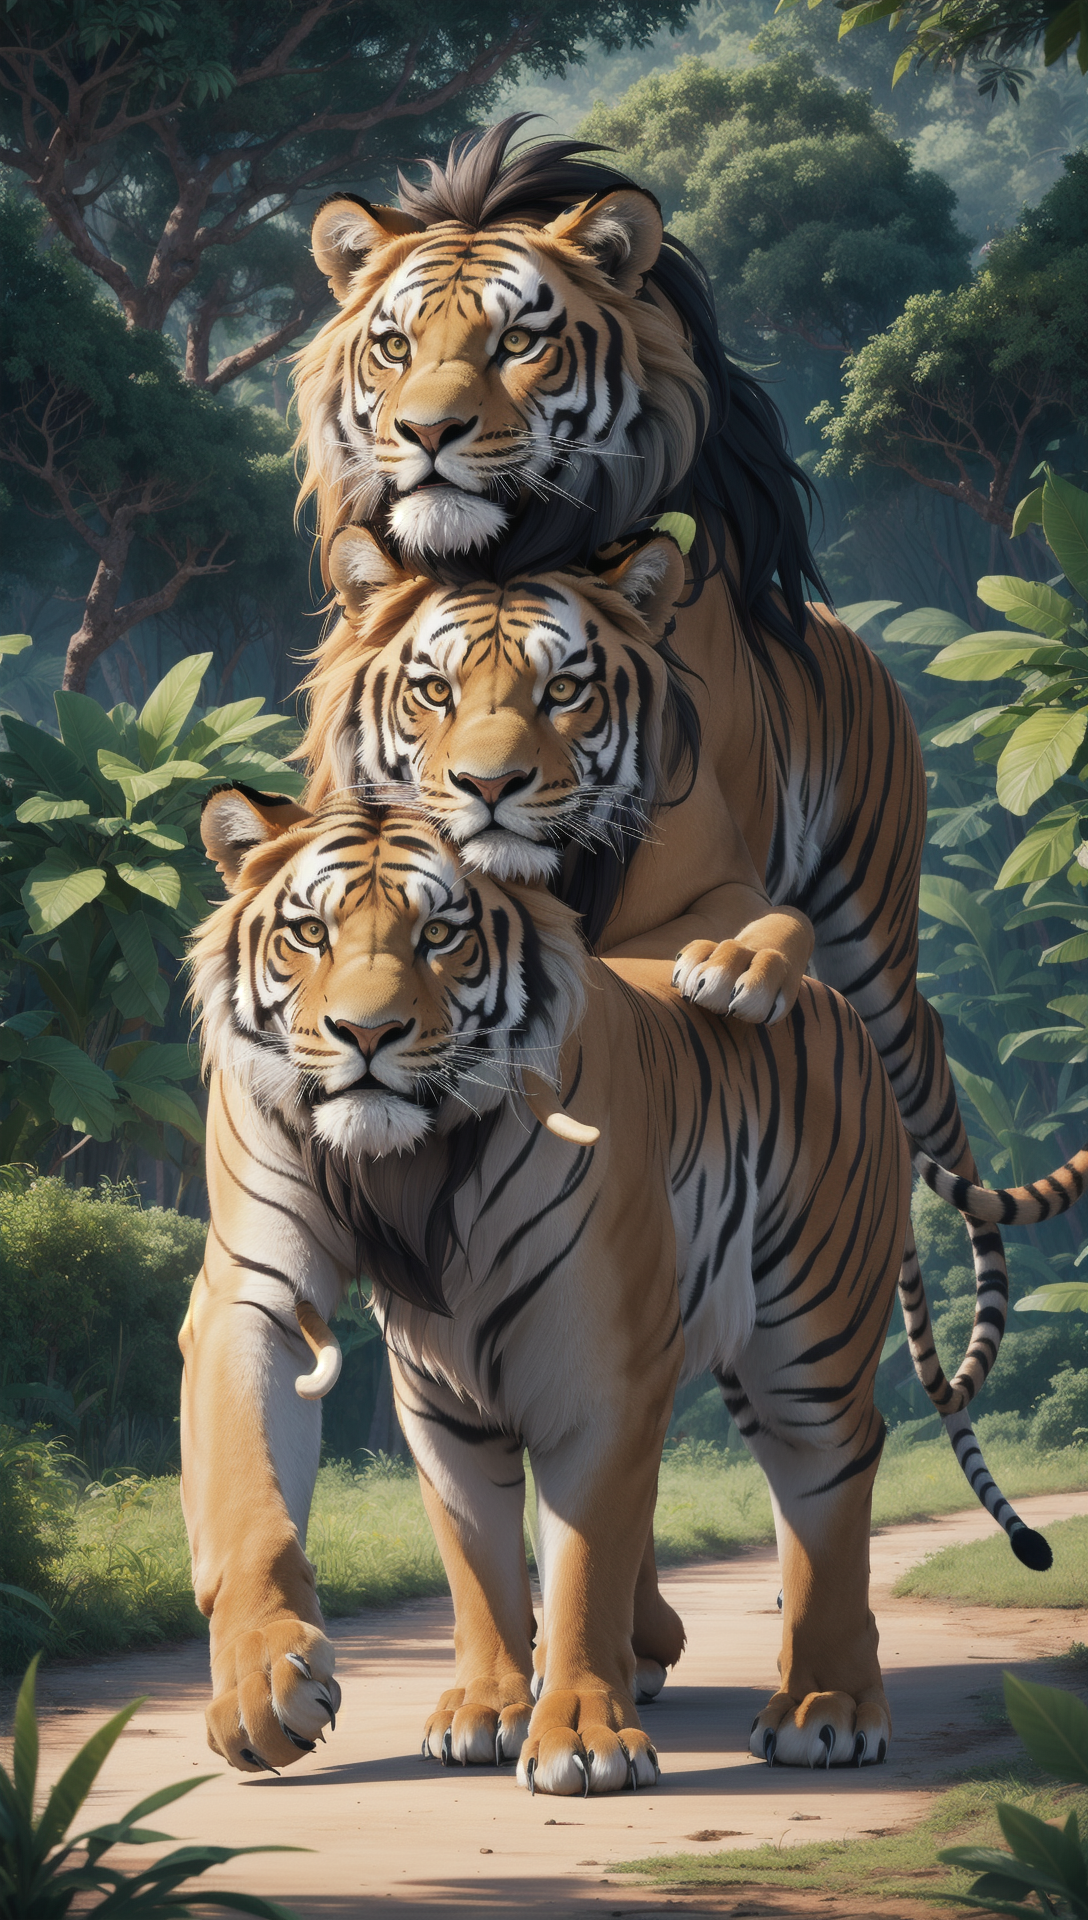

In [ ]:
import websocket
import uuid
import json
import urllib.request
import urllib.parse
import random


import websocket
import threading

def on_message(ws, message):
    print("Received message: ", message)

def on_error(ws, error):
    print("Error: ", error)

def on_close(ws, close_status_code, close_msg):
    print("### Connection Closed ###")
    # Here you can handle reconnection if necessary
    # For example, restart your WebSocket connection

def on_open(ws):
    def run(*args):
        # Logic after opening the WebSocket
        pass

    threading.Thread(target=run).start()

# Start WebSocket connection
def start_websocket():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("wss://modern-wombats-send.loca.lt",
                                on_open=on_open,
                                on_message=on_message,
                                on_error=on_error,
                                on_close=on_close)

    ws.run_forever()

start_websocket()




# Use your localtunnel URL as the server address
server_address = "modern-wombats-send.loca.lt"
client_id = str(uuid.uuid4())

def queue_prompt(prompt):
    p = {"prompt": prompt, "client_id": client_id}
    data = json.dumps(p).encode('utf-8')
    req = urllib.request.Request("https://{}/prompt".format(server_address), data=data)
    return json.loads(urllib.request.urlopen(req).read())

def get_image(filename, subfolder, folder_type):
    data = {"filename": filename, "subfolder": subfolder, "type": folder_type}
    url_values = urllib.parse.urlencode(data)
    with urllib.request.urlopen("https://{}/view?{}".format(server_address, url_values)) as response:
        return response.read()

def get_history(prompt_id):
    with urllib.request.urlopen("https://{}/history/{}".format(server_address, prompt_id)) as response:
        return json.loads(response.read())

def get_images(ws, prompt):
    prompt_id = queue_prompt(prompt)['prompt_id']
    output_images = {}
    while True:
        out = ws.recv()
        if isinstance(out, str):
            message = json.loads(out)
            if message['type'] == 'executing':
                data = message['data']
                if data['node'] is None and data['prompt_id'] == prompt_id:
                    break
        else:
            continue

    history = get_history(prompt_id)[prompt_id]
    for o in history['outputs']:
        for node_id in history['outputs']:
            node_output = history['outputs'][node_id]
            if 'images' in node_output:
                images_output = []
                for image in node_output['images']:
                    image_data = get_image(image['filename'], image['subfolder'], image['type'])
                    images_output.append(image_data)
            output_images[node_id] = images_output

    return output_images

# Read workflow data
with open("/content/drive/MyDrive/workflows/workflow_api10.json", "r", encoding="utf-8") as f:
    workflow_data = f.read()

workflow = json.loads(workflow_data)

# Set inputs
#workflow["6"]["inputs"]["text"] = input("Please enter a prompt\n")
#workflow["5"]["inputs"]["batch_size"] = int(input("Please enter a batch size\n"))
#workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"
#workflow["3"]["inputs"]["seed"] = 76778899966
#workflow["4"]["inputs"]["ckpt_name"] = "picxReal_10.safetensors"

# Connect to WebSocket
ws = websocket.WebSocket()
ws.connect("wss://{}/ws?clientId={}".format(server_address, client_id))
images = get_images(ws, workflow)

from PIL import Image
import io
from IPython.display import display

# Display images
for node_id in images:
    for image_data in images[node_id]:
        image = Image.open(io.BytesIO(image_data))
        display(image)



In [ ]:
!pip install --upgrade google-api-python-client google-auth google-auth-oauthlib google-auth-httplib2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, bu

# **Code for anvil function**

In [14]:
import websocket
import uuid
import json
import urllib.request
import urllib.parse
import random
import websocket
import threading

import io
from PIL import Image
from googleapiclient.discovery import build
from google.oauth2.credentials import Credentials
from googleapiclient.http import MediaIoBaseUpload

@anvil.server.callable
def image_gen(User_prompt):


    # ... existing code to generate images ...
    prompts=User_prompt
    import spacy

    # Load the English tokenizer, tagger, parser, NER, and word vectors
    nlp = spacy.load("en_core_web_sm")

    # Asking for user input
    ethnicities_list = ["kyrgyz", "maasai", "newar", "altai", "bengali", "haitian", "hazara", "kiche", "lahu",
                        "mizrahi", "quechua", "xhosa", "cree", "sami", "inuit", "walpiri", "maori", "basque",
                        "mazigh", "najdi","kalash"]
    lora_dictionary={"kyrgyz":"kyrgyz.safetensors", "maasai":"Masaai test Lora.safetensors", "newar":"Newar.safetensors", "altai":0, "bengali":0, "haitian":"Haitian.safetensors", "hazara":"Hazara.safetensors", "kiche":0, "lahu":"last.safetensors",
                        "mizrahi":0, "quechua":0, "xhosa":"Xhosa.safetensors", "cree":0, "sami":"Sami.safetensors", "inuit":0, "walpiri":0, "maori":"Maori.safetensors", "basque":0,
                        "mazigh":0, "najdi":0,"kalash":"Kalash_women_cluster2.safetensors"}
    #user_prompt = input("Please enter your text prompt: ")
    user_prompt= prompts
    updated_sentences=[]
    lora_list=[]
    # Process the text
    doc = nlp(user_prompt)
    def is_passive(sentence):
        doc = nlp(sentence)
        passive = False
        for token in doc:
            # Check if there's a token that is a passive subject
            if token.dep_ == 'nsubjpass':
                passive = True
        return passive
    def process_text(text):
        doc = nlp(text)
        updated_sentences = []
        for sent in doc.sents:
            print(f"Sentence: {sent.text}")
            if is_passive(sent.text):
              updated_sentence = passive_to_active(sent.text)
              updated_sentences.append(updated_sentence)
            else:
              updated_sentence = sent.text
              updated_sentences.append(updated_sentence)
            for token in sent:
              if str(token).lower() in ethnicities_list:
                  print(token)
                  lora_list.append(token)
        updated_doc = nlp(" ".join(updated_sentences))

        return updated_doc
    # POS tagging and identifying subjects, verbs, and objects
    processed_doc = process_text(user_prompt)
    for sent in processed_doc.sents:
        print(f"Sentence: {sent.text}")
        subjects, verbs, objects = [], [], []
        for token in sent:
            print(f"{token.text:10} {token.pos_:10}")

            if "subj" in token.dep_:
                subjects.append(token.text)
            if token.pos_ == "VERB":
                verbs.append(token.text)

            if "obj" in token.dep_:
                objects.append(token.text)
    # import requests
    # import json

    # # Replace 'Your_API_Key' with your actual Pixabay API key
    # API_KEY = '42825189-659d2e470c25fe20af6678a1c'
    # SEARCH_TERM = 'person '+verbs[0]

    # def search_pixabay_images(query, api_key, per_page=10):
    #     url = f"https://pixabay.com/api/?key={api_key}&q={query}&image_type=photo&per_page={per_page}"
    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         return response.json()
    #     else:
    #         return None

    # # Search for images
    # result = search_pixabay_images(SEARCH_TERM, API_KEY)

    # # Print results
    # if result:
    #     for image in result.get('hits', []):
    #         print(image['webformatURL'])
    # else:
    #     print("No results found or error in request")
    # import requests
    # import os

    # def download_and_save_image(url, folder_path, image_name):
    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         with open(os.path.join(folder_path, image_name), 'wb') as file:
    #             file.write(response.content)
    #     else:
    #         print(f"Failed to download {url}")

    # # Define the folder path in Google Drive
    # drive_folder_path = '/content/drive/MyDrive/ControlNetImages'  # Change to your path
    # os.makedirs(drive_folder_path, exist_ok=True)

    # # Download and save each image
    # if result:
    #     for index, image in enumerate(result.get('hits', [])):
    #         image_url = image['webformatURL']
    #         image_name = f"image_{index}.jpg"  # Image names like image_0.jpg, image_1.jpg, etc.
    #         download_and_save_image(image_url, drive_folder_path, image_name)
    # else:
    #     print("No results found or error in request")
    # import requests
    # import os

    # def get_pexels_images(api_key, query, per_page=4):
    #     headers = {'Authorization': api_key}
    #     params = {'query': query, 'per_page': per_page}
    #     response = requests.get('https://api.pexels.com/v1/search', headers=headers, params=params)
    #     return response.json()

    # def download_image(url, folder="/content/drive/MyDrive/ControlNetImages"):
    #     if not os.path.exists(folder):
    #         os.makedirs(folder)

    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         file_path = os.path.join(folder, url.split('/')[-1])
    #         with open(file_path, 'wb') as file:
    #             file.write(response.content)
    #         print(f"Downloaded {file_path}")

    # # Replace with your actual Pexels API key
    # API_KEY = 'JyAPn2giACsepLq3R7pmTli4WAJEPJtCQgAihHLzFAmAmAvnTwbelVvV'
    # SEARCH_QUERY = 'person '+ verbs[0]

    # images_data = get_pexels_images(API_KEY, SEARCH_QUERY)

    # for photo in images_data['photos']:
    #     download_image(photo['src']['original'])
    # from google.colab import drive
    # import os
    # import shutil

    # # Mount Google Drive
    # drive.mount('/content/drive')

    # # Define the source path (Google Drive folder you want to copy) and the destination path (new folder in /content)
    # source_folder = '/content/drive/MyDrive/ControlNetImages'  # Adjust this path
    # destination_folder = '/content/Output'  # Adjust this folder name as needed

    # # Create the destination folder if it doesn't exist
    # if not os.path.exists(destination_folder):
    #     os.makedirs(destination_folder)

    # # Copy the entire folder from Google Drive to the new folder in /content
    # for item in os.listdir(source_folder):
    #     s = os.path.join(source_folder, item)
    #     d = os.path.join(destination_folder, item)
    #     if os.path.isdir(s):
    #         shutil.copytree(s, d, False, None)
    #     else:
    #         shutil.copy2(s, d)

    # print(f"Folder '{source_folder}' has been copied to '{destination_folder}'")
    # import os
    # from IPython.display import Image as IPImage

    # # Define the path to the folder containing your images
    # images_folder = "/content/Output"  # Update this to your images folder path

    # # Ensure OpenPose binaries are executable
    # !chmod +x /content/openpose/build/examples/openpose/openpose.bin

    # # Define the output folder for JSON and rendered images
    # output_folder = "/content/Final"
    # os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist

    # # Run OpenPose on the images in the specified folder
    # !cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir {images_folder} --write_json {output_folder} --display 0 --write_images {output_folder}

    # # If you want to display an example of the output, specify one of the output files
    # # This is optional and just for demonstration purposes
    # import os
    # import json
    # import shutil

    # input_folder = '/content/Final'  # Change this to your OpenPose output folder path
    # best_image_folder = '/content'  # Change this to your desired output path for the best image
    # os.makedirs(best_image_folder, exist_ok=True)

    # def score_image(json_path):
    #     """Scores an image based on keypoints and their confidence scores."""
    #     with open(json_path, 'r') as f:
    #         data = json.load(f)

    #     score = 0
    #     for person in data['people']:
    #         keypoints = person['pose_keypoints_2d']
    #         confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
    #         score += sum(confidence_scores)  # Sum of confidence scores as the score
    #     return score

    # # Scoring images
    # scores = {}
    # for filename in os.listdir(input_folder):
    #     if filename.endswith('.json'):
    #         json_path = os.path.join(input_folder, filename)
    #         scores[filename] = score_image(json_path)

    # # Identifying the best-scored image
    # best_image_json = max(scores, key=scores.get)
    # best_image_base = os.path.splitext(best_image_json)[0]

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Saving the best image in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

    # print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
    # import os
    # import json
    # import shutil

    # input_folder = '/content/Final'  # Change this to your OpenPose output folder path
    # best_image_folder = '/content'  # Change this to your desired output path for the best image
    # os.makedirs(best_image_folder, exist_ok=True)

    # def score_image(json_path):
    #     """Scores an image based on keypoints and their confidence scores."""
    #     with open(json_path, 'r') as f:
    #         data = json.load(f)

    #     score = 0
    #     for person in data['people']:
    #         keypoints = person['pose_keypoints_2d']
    #         confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
    #         score += sum(confidence_scores)  # Sum of confidence scores as the score
    #     return score

    # # Scoring images
    # scores = {}
    # for filename in os.listdir(input_folder):
    #     if filename.endswith('.json'):
    #         json_path = os.path.join(input_folder, filename)
    #         scores[filename] = score_image(json_path)

    # # Identifying the best-scored image
    # best_image_json = max(scores, key=scores.get)
    # best_image_base = os.path.splitext(best_image_json)[0]

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Saving the best image in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

    # print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
    # import os
    # import shutil

    # # Let's assume input_folder, best_image_base, and best_image_folder are defined earlier in your code

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Specify the new name for the file here
    # new_filename = "new_best_image.png"

    # # Saving the best image with the new name in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, new_filename))

    # print(f"Best image '{new_filename}' saved in '{best_image_folder}'")
    # import os
    # from google.colab import files
    # from IPython.display import Image as IPImage

    # # Upload an image (or use a pre-existing one)
    # #uploaded = files.upload()
    # image_path = "/content/image_1_rendered (1).png"  # Get the name of the uploaded image

    # # Ensure OpenPose binaries are executable
    # !chmod +x /content/openpose/build/examples/openpose/openpose.bin

    # # Run OpenPose on the uploaded image
    # # Adjust the parameters as needed
    # output_folder = "/content/drive/MyDrive/ControlNetImages2"
    # os.makedirs(output_folder, exist_ok=True)  # Create output directory
    # !cd /content/openpose && ./build/examples/openpose/openpose.bin \
    #     --image_dir /content/ \
    #     --render_pose 1 \
    #     --disable_blending \
    #     --display 0 \
    #     --write_images {output_folder} \
    #     --write_json {output_folder}

    # # Display the output
    # output_image = os.path.join(output_folder, os.path.basename("new_best_image_rendered.png"))
#This is where you add the remaining code
    def on_message(ws, message):
          print("Received message: ", message)

    def on_error(ws, error):
        print("Error: ", error)

    def on_close(ws, close_status_code, close_msg):
        print("### Connection Closed ###")
        # Here you can handle reconnection if necessary
        # For example, restart your WebSocket connection

    def on_open(ws):
        def run(*args):
            # Logic after opening the WebSocket
            pass

        threading.Thread(target=run).start()

    # Start WebSocket connection
    def start_websocket():
        websocket.enableTrace(True)
        ws = websocket.WebSocketApp("wss://lazy-rooms-chew.loca.lt",
                                    on_open=on_open,
                                    on_message=on_message,
                                    on_error=on_error,
                                    on_close=on_close)

        ws.run_forever()

    start_websocket()




    # Use your localtunnel URL as the server address
    server_address = "lazy-rooms-chew.loca.lt"
    client_id = str(uuid.uuid4())

    def queue_prompt(prompt):
        p = {"prompt": prompt, "client_id": client_id}
        data = json.dumps(p).encode('utf-8')
        req = urllib.request.Request("https://{}/prompt".format(server_address), data=data)
        return json.loads(urllib.request.urlopen(req).read())

    def get_image(filename, subfolder, folder_type):
        data = {"filename": filename, "subfolder": subfolder, "type": folder_type}
        url_values = urllib.parse.urlencode(data)
        with urllib.request.urlopen("https://{}/view?{}".format(server_address, url_values)) as response:
            return response.read()

    def get_history(prompt_id):
        with urllib.request.urlopen("https://{}/history/{}".format(server_address, prompt_id)) as response:
            return json.loads(response.read())

    def get_images(ws, prompt):
        prompt_id = queue_prompt(prompt)['prompt_id']
        output_images = {}
        while True:
            out = ws.recv()
            if isinstance(out, str):
                message = json.loads(out)
                if message['type'] == 'executing':
                    data = message['data']
                    if data['node'] is None and data['prompt_id'] == prompt_id:
                        break
            else:
                continue

        history = get_history(prompt_id)[prompt_id]
        for o in history['outputs']:
            for node_id in history['outputs']:
                node_output = history['outputs'][node_id]
                if 'images' in node_output:
                    images_output = []
                    for image in node_output['images']:
                        image_data = get_image(image['filename'], image['subfolder'], image['type'])
                        images_output.append(image_data)
                output_images[node_id] = images_output

        return output_images

    # Read workflow data
    with open("/content/drive/MyDrive/workflows/workflow_api_controlnet_working.json", "r", encoding="utf-8") as f:
        workflow_data = f.read()

    workflow = json.loads(workflow_data)

    # Set inputs
    workflow["6"]["inputs"]["text"] = prompts
    workflow["5"]["inputs"]["batch_size"] = 1
    workflow["5"]["inputs"]["height"] = 1024
    workflow["5"]["inputs"]["width"] = 768
    workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"
    workflow["3"]["inputs"]["seed"] = 76778899966
    workflow["4"]["inputs"]["ckpt_name"] = "picxReal_10.safetensors"
    #workflow["17"]["inputs"]["lora_name"] = "Kalash_women_cluster2.safetensors"
    workflow["17"]["inputs"]["lora_name"] = lora_dictionary[str(lora_list[0]).lower()]
    workflow["12"]["inputs"]["image"] = "/content/drive/MyDrive/ControlNetImages2/image_1_rendered (1)_rendered.png"
    # Connect to WebSocket
    ws = websocket.WebSocket()
    ws.connect("wss://{}/ws?clientId={}".format(server_address, client_id))
    images = get_images(ws, workflow)
    for node_id in images:
      for image_data in images[node_id]:
        image = Image.open(io.BytesIO(image_data))
        Name="image"
        bs= io.BytesIO()
        image.save(bs, format="JPEG")
        bs.seek(0)
  # Load credentials
    from google.oauth2 import service_account

    # Load credentials
    creds = service_account.Credentials.from_service_account_file('/content/drive/MyDrive/Json file/linear-encoder-399414-1227a60ca1fe.json')

    service = build('drive', 'v3', credentials=creds)

    folder_id = "1-8fEyVP92FFYE-fjOx7-ZVRSzL8AR0NV"  # Google Drive folder ID where images will be saved

    image_urls = []

    for node_id in images:
        for index, image_data in enumerate(images[node_id]):
            # Upload image to Google Drive
            file_metadata = {
                'name': f'image_{prompts}_{index}.png',
                'parents': [folder_id]
            }
            media = MediaIoBaseUpload(io.BytesIO(image_data), mimetype='image/jpeg')
            file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()

            # Get shareable link
            service.permissions().create(fileId=file['id'], body={'type': 'anyone', 'role': 'reader'}).execute()
            image_url = f"https://drive.google.com/uc?export=view&id={file['id']}"
            image_urls.append(image_url)

    return anvil.BlobMedia("image/jpeg", bs.getvalue(), name=Name)


# **Anvil code for presentation**

In [5]:
import websocket
import uuid
import json
import urllib.request
import urllib.parse
import random
import websocket
import threading

import io
from PIL import Image
from googleapiclient.discovery import build
from google.oauth2.credentials import Credentials
from googleapiclient.http import MediaIoBaseUpload

@anvil.server.callable
def image_gen(User_prompt):


    # ... existing code to generate images ...
    prompts=User_prompt
    import spacy

    # Load the English tokenizer, tagger, parser, NER, and word vectors
    nlp = spacy.load("en_core_web_sm")

    # Asking for user input
    ethnicities_list = ["kyrgyz", "maasai", "newar", "altai", "bengali", "haitian", "hazara", "kiche", "lahu",
                        "mizrahi", "quechua", "xhosa", "cree", "sami", "inuit", "walpiri", "maori", "basque",
                        "mazigh", "najdi","kalash"]
    lora_dictionary={"kyrgyz":"kyrgyz.safetensors", "maasai":"Masaai test Lora.safetensors", "newar":"Newar.safetensors", "altai":0, "bengali":0, "haitian":"Haitian.safetensors", "hazara":"Hazara.safetensors", "kiche":0, "lahu":"last.safetensors",
                        "mizrahi":0, "quechua":0, "xhosa":"Xhosa.safetensors", "cree":0, "sami":"Sami.safetensors", "inuit":0, "walpiri":0, "maori":"Maori.safetensors", "basque":0,
                        "mazigh":0, "najdi":0,"kalash":"Kalash_women_cluster2.safetensors"}
    #user_prompt = input("Please enter your text prompt: ")
    user_prompt= prompts
    updated_sentences=[]
    lora_list=[]
    # Process the text
    doc = nlp(user_prompt)
    def is_passive(sentence):
        doc = nlp(sentence)
        passive = False
        for token in doc:
            # Check if there's a token that is a passive subject
            if token.dep_ == 'nsubjpass':
                passive = True
        return passive
    def process_text(text):
        doc = nlp(text)
        updated_sentences = []
        for sent in doc.sents:
            print(f"Sentence: {sent.text}")
            if is_passive(sent.text):
              updated_sentence = passive_to_active(sent.text)
              updated_sentences.append(updated_sentence)
            else:
              updated_sentence = sent.text
              updated_sentences.append(updated_sentence)
            for token in sent:
              if str(token).lower() in ethnicities_list:
                  print(token)
                  lora_list.append(token)
        updated_doc = nlp(" ".join(updated_sentences))

        return updated_doc
    # POS tagging and identifying subjects, verbs, and objects
    processed_doc = process_text(user_prompt)
    for sent in processed_doc.sents:
        print(f"Sentence: {sent.text}")
        subjects, verbs, objects = [], [], []
        for token in sent:
            print(f"{token.text:10} {token.pos_:10}")

            if "subj" in token.dep_:
                subjects.append(token.text)
            if token.pos_ == "VERB":
                verbs.append(token.text)

            if "obj" in token.dep_:
                objects.append(token.text)
    # import requests
    # import json

    # # Replace 'Your_API_Key' with your actual Pixabay API key
    # API_KEY = '42825189-659d2e470c25fe20af6678a1c'
    # SEARCH_TERM = 'person '+verbs[0]

    # def search_pixabay_images(query, api_key, per_page=10):
    #     url = f"https://pixabay.com/api/?key={api_key}&q={query}&image_type=photo&per_page={per_page}"
    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         return response.json()
    #     else:
    #         return None

    # # Search for images
    # result = search_pixabay_images(SEARCH_TERM, API_KEY)

    # # Print results
    # if result:
    #     for image in result.get('hits', []):
    #         print(image['webformatURL'])
    # else:
    #     print("No results found or error in request")
    # import requests
    # import os

    # def download_and_save_image(url, folder_path, image_name):
    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         with open(os.path.join(folder_path, image_name), 'wb') as file:
    #             file.write(response.content)
    #     else:
    #         print(f"Failed to download {url}")

    # # Define the folder path in Google Drive
    # drive_folder_path = '/content/drive/MyDrive/ControlNetImages'  # Change to your path
    # os.makedirs(drive_folder_path, exist_ok=True)

    # # Download and save each image
    # if result:
    #     for index, image in enumerate(result.get('hits', [])):
    #         image_url = image['webformatURL']
    #         image_name = f"image_{index}.jpg"  # Image names like image_0.jpg, image_1.jpg, etc.
    #         download_and_save_image(image_url, drive_folder_path, image_name)
    # else:
    #     print("No results found or error in request")
    # import requests
    # import os

    # def get_pexels_images(api_key, query, per_page=4):
    #     headers = {'Authorization': api_key}
    #     params = {'query': query, 'per_page': per_page}
    #     response = requests.get('https://api.pexels.com/v1/search', headers=headers, params=params)
    #     return response.json()

    # def download_image(url, folder="/content/drive/MyDrive/ControlNetImages"):
    #     if not os.path.exists(folder):
    #         os.makedirs(folder)

    #     response = requests.get(url)
    #     if response.status_code == 200:
    #         file_path = os.path.join(folder, url.split('/')[-1])
    #         with open(file_path, 'wb') as file:
    #             file.write(response.content)
    #         print(f"Downloaded {file_path}")

    # # Replace with your actual Pexels API key
    # API_KEY = 'JyAPn2giACsepLq3R7pmTli4WAJEPJtCQgAihHLzFAmAmAvnTwbelVvV'
    # SEARCH_QUERY = 'person '+ verbs[0]

    # images_data = get_pexels_images(API_KEY, SEARCH_QUERY)

    # for photo in images_data['photos']:
    #     download_image(photo['src']['original'])
    # from google.colab import drive
    # import os
    # import shutil

    # # Mount Google Drive
    # drive.mount('/content/drive')

    # # Define the source path (Google Drive folder you want to copy) and the destination path (new folder in /content)
    # source_folder = '/content/drive/MyDrive/ControlNetImages'  # Adjust this path
    # destination_folder = '/content/Output'  # Adjust this folder name as needed

    # # Create the destination folder if it doesn't exist
    # if not os.path.exists(destination_folder):
    #     os.makedirs(destination_folder)

    # # Copy the entire folder from Google Drive to the new folder in /content
    # for item in os.listdir(source_folder):
    #     s = os.path.join(source_folder, item)
    #     d = os.path.join(destination_folder, item)
    #     if os.path.isdir(s):
    #         shutil.copytree(s, d, False, None)
    #     else:
    #         shutil.copy2(s, d)

    # print(f"Folder '{source_folder}' has been copied to '{destination_folder}'")
    # import os
    # from IPython.display import Image as IPImage

    # # Define the path to the folder containing your images
    # images_folder = "/content/Output"  # Update this to your images folder path

    # # Ensure OpenPose binaries are executable
    # !chmod +x /content/openpose/build/examples/openpose/openpose.bin

    # # Define the output folder for JSON and rendered images
    # output_folder = "/content/Final"
    # os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist

    # # Run OpenPose on the images in the specified folder
    # !cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir {images_folder} --write_json {output_folder} --display 0 --write_images {output_folder}

    # # If you want to display an example of the output, specify one of the output files
    # # This is optional and just for demonstration purposes
    # import os
    # import json
    # import shutil

    # input_folder = '/content/Final'  # Change this to your OpenPose output folder path
    # best_image_folder = '/content'  # Change this to your desired output path for the best image
    # os.makedirs(best_image_folder, exist_ok=True)

    # def score_image(json_path):
    #     """Scores an image based on keypoints and their confidence scores."""
    #     with open(json_path, 'r') as f:
    #         data = json.load(f)

    #     score = 0
    #     for person in data['people']:
    #         keypoints = person['pose_keypoints_2d']
    #         confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
    #         score += sum(confidence_scores)  # Sum of confidence scores as the score
    #     return score

    # # Scoring images
    # scores = {}
    # for filename in os.listdir(input_folder):
    #     if filename.endswith('.json'):
    #         json_path = os.path.join(input_folder, filename)
    #         scores[filename] = score_image(json_path)

    # # Identifying the best-scored image
    # best_image_json = max(scores, key=scores.get)
    # best_image_base = os.path.splitext(best_image_json)[0]

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Saving the best image in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

    # print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
    # import os
    # import json
    # import shutil

    # input_folder = '/content/Final'  # Change this to your OpenPose output folder path
    # best_image_folder = '/content'  # Change this to your desired output path for the best image
    # os.makedirs(best_image_folder, exist_ok=True)

    # def score_image(json_path):
    #     """Scores an image based on keypoints and their confidence scores."""
    #     with open(json_path, 'r') as f:
    #         data = json.load(f)

    #     score = 0
    #     for person in data['people']:
    #         keypoints = person['pose_keypoints_2d']
    #         confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
    #         score += sum(confidence_scores)  # Sum of confidence scores as the score
    #     return score

    # # Scoring images
    # scores = {}
    # for filename in os.listdir(input_folder):
    #     if filename.endswith('.json'):
    #         json_path = os.path.join(input_folder, filename)
    #         scores[filename] = score_image(json_path)

    # # Identifying the best-scored image
    # best_image_json = max(scores, key=scores.get)
    # best_image_base = os.path.splitext(best_image_json)[0]

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Saving the best image in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

    # print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
    # import os
    # import shutil

    # # Let's assume input_folder, best_image_base, and best_image_folder are defined earlier in your code

    # # Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
    # best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

    # # Specify the new name for the file here
    # new_filename = "new_best_image.png"

    # # Saving the best image with the new name in the specified folder
    # shutil.copy(best_image_path, os.path.join(best_image_folder, new_filename))

    # print(f"Best image '{new_filename}' saved in '{best_image_folder}'")
    # import os
    # from google.colab import files
    # from IPython.display import Image as IPImage

    # # Upload an image (or use a pre-existing one)
    # #uploaded = files.upload()
    # image_path = "/content/image_1_rendered (1).png"  # Get the name of the uploaded image

    # # Ensure OpenPose binaries are executable
    # !chmod +x /content/openpose/build/examples/openpose/openpose.bin

    # # Run OpenPose on the uploaded image
    # # Adjust the parameters as needed
    # output_folder = "/content/drive/MyDrive/ControlNetImages2"
    # os.makedirs(output_folder, exist_ok=True)  # Create output directory
    # !cd /content/openpose && ./build/examples/openpose/openpose.bin \
    #     --image_dir /content/ \
    #     --render_pose 1 \
    #     --disable_blending \
    #     --display 0 \
    #     --write_images {output_folder} \
    #     --write_json {output_folder}

    # # Display the output
    # output_image = os.path.join(output_folder, os.path.basename("new_best_image_rendered.png"))
#This is where you add the remaining code
    def on_message(ws, message):
          print("Received message: ", message)

    def on_error(ws, error):
        print("Error: ", error)

    def on_close(ws, close_status_code, close_msg):
        print("### Connection Closed ###")
        # Here you can handle reconnection if necessary
        # For example, restart your WebSocket connection

    def on_open(ws):
        def run(*args):
            # Logic after opening the WebSocket
            pass

        threading.Thread(target=run).start()

    # Start WebSocket connection
    def start_websocket():
        websocket.enableTrace(True)
        ws = websocket.WebSocketApp("wss://lovely-sites-admire.loca.lt",
                                    on_open=on_open,
                                    on_message=on_message,
                                    on_error=on_error,
                                    on_close=on_close)

        ws.run_forever()

    start_websocket()




    # Use your localtunnel URL as the server address
    server_address = "lovely-sites-admire.loca.lt"
    client_id = str(uuid.uuid4())

    def queue_prompt(prompt):
        p = {"prompt": prompt, "client_id": client_id}
        data = json.dumps(p).encode('utf-8')
        req = urllib.request.Request("https://{}/prompt".format(server_address), data=data)
        return json.loads(urllib.request.urlopen(req).read())

    def get_image(filename, subfolder, folder_type):
        data = {"filename": filename, "subfolder": subfolder, "type": folder_type}
        url_values = urllib.parse.urlencode(data)
        with urllib.request.urlopen("https://{}/view?{}".format(server_address, url_values)) as response:
            return response.read()

    def get_history(prompt_id):
        with urllib.request.urlopen("https://{}/history/{}".format(server_address, prompt_id)) as response:
            return json.loads(response.read())

    def get_images(ws, prompt):
        prompt_id = queue_prompt(prompt)['prompt_id']
        output_images = {}
        while True:
            out = ws.recv()
            if isinstance(out, str):
                message = json.loads(out)
                if message['type'] == 'executing':
                    data = message['data']
                    if data['node'] is None and data['prompt_id'] == prompt_id:
                        break
            else:
                continue

        history = get_history(prompt_id)[prompt_id]
        for o in history['outputs']:
            for node_id in history['outputs']:
                node_output = history['outputs'][node_id]
                if 'images' in node_output:
                    images_output = []
                    for image in node_output['images']:
                        image_data = get_image(image['filename'], image['subfolder'], image['type'])
                        images_output.append(image_data)
                output_images[node_id] = images_output

        return output_images

    # Read workflow data
    with open("/content/drive/MyDrive/workflows/workflow_api_lora.json", "r", encoding="utf-8") as f:
        workflow_data = f.read()

    workflow = json.loads(workflow_data)

    # Set inputs
    # workflow["6"]["inputs"]["text"] = prompts
    # workflow["5"]["inputs"]["batch_size"] = 1
    # workflow["5"]["inputs"]["height"] = 1024
    # workflow["5"]["inputs"]["width"] = 768
    # workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"
    # workflow["3"]["inputs"]["seed"] = 76778899966
    # workflow["4"]["inputs"]["ckpt_name"] = "picxReal_10.safetensors"
    # #workflow["17"]["inputs"]["lora_name"] = "Kalash_women_cluster2.safetensors"
    # workflow["17"]["inputs"]["lora_name"] = lora_dictionary[str(lora_list[0]).lower()]
    # workflow["12"]["inputs"]["image"] = "/content/drive/MyDrive/ControlNetImages2/image_1_rendered (1)_rendered.png"

    # Set inputs
    workflow["6"]["inputs"]["text"] = prompts
    workflow["5"]["inputs"]["batch_size"] = 1
    workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"
    workflow["3"]["inputs"]["seed"] = 76778899966
    workflow["4"]["inputs"]["ckpt_name"] = "picxReal_10.safetensors"
    workflow["10"]["inputs"]["lora_name"] = lora_dictionary[str(lora_list[0]).lower()]
    # Connect to WebSocket
    ws = websocket.WebSocket()
    ws.connect("wss://{}/ws?clientId={}".format(server_address, client_id))
    images = get_images(ws, workflow)
    for node_id in images:
      for image_data in images[node_id]:
        image = Image.open(io.BytesIO(image_data))
        Name="image"
        bs= io.BytesIO()
        image.save(bs, format="JPEG")
        bs.seek(0)
  # Load credentials
    from google.oauth2 import service_account

    # Load credentials
    creds = service_account.Credentials.from_service_account_file('/content/drive/MyDrive/Json file/linear-encoder-399414-1227a60ca1fe.json')

    service = build('drive', 'v3', credentials=creds)

    folder_id = "1-8fEyVP92FFYE-fjOx7-ZVRSzL8AR0NV"  # Google Drive folder ID where images will be saved

    image_urls = []

    for node_id in images:
        for index, image_data in enumerate(images[node_id]):
            # Upload image to Google Drive
            file_metadata = {
                'name': f'image_{prompts}_{index}.png',
                'parents': [folder_id]
            }
            media = MediaIoBaseUpload(io.BytesIO(image_data), mimetype='image/jpeg')
            file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()

            # Get shareable link
            service.permissions().create(fileId=file['id'], body={'type': 'anyone', 'role': 'reader'}).execute()
            image_url = f"https://drive.google.com/uc?export=view&id={file['id']}"
            image_urls.append(image_url)

    return anvil.BlobMedia("image/jpeg", bs.getvalue(), name=Name)


In [ ]:
import websocket
import uuid
import json
import urllib.request
import urllib.parse
import random
import websocket
import threading
import io
from googleapiclient.discovery import build
from google.oauth2.credentials import Credentials
from googleapiclient.http import MediaIoBaseUpload
def on_message(ws, message):
      print("Received message: ", message)

def on_error(ws, error):
    print("Error: ", error)

def on_close(ws, close_status_code, close_msg):
    print("### Connection Closed ###")
    # Here you can handle reconnection if necessary
    # For example, restart your WebSocket connection

def on_open(ws):
    def run(*args):
        # Logic after opening the WebSocket
        pass

    threading.Thread(target=run).start()

# Start WebSocket connection
def start_websocket():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("wss://two-sheep-join.loca.lt",
                                on_open=on_open,
                                on_message=on_message,
                                on_error=on_error,
                                on_close=on_close)

    ws.run_forever()

start_websocket()

# Use your localtunnel URL as the server address
server_address = "two-sheep-join.loca.lt"
client_id = str(uuid.uuid4())

def queue_prompt(prompt):
    p = {"prompt": prompt, "client_id": client_id}
    data = json.dumps(p).encode('utf-8')
    req = urllib.request.Request("https://{}/prompt".format(server_address), data=data)
    return json.loads(urllib.request.urlopen(req).read())

def get_image(filename, subfolder, folder_type):
    data = {"filename": filename, "subfolder": subfolder, "type": folder_type}
    url_values = urllib.parse.urlencode(data)
    with urllib.request.urlopen("https://{}/view?{}".format(server_address, url_values)) as response:
        return response.read()

def get_history(prompt_id):
    with urllib.request.urlopen("https://{}/history/{}".format(server_address, prompt_id)) as response:
        return json.loads(response.read())

def get_images(ws, prompt):
    prompt_id = queue_prompt(prompt)['prompt_id']
    output_images = {}
    while True:
        out = ws.recv()
        if isinstance(out, str):
            message = json.loads(out)
            if message['type'] == 'executing':
                data = message['data']
                if data['node'] is None and data['prompt_id'] == prompt_id:
                    break
        else:
            continue

    history = get_history(prompt_id)[prompt_id]
    for o in history['outputs']:
        for node_id in history['outputs']:
            node_output = history['outputs'][node_id]
            if 'images' in node_output:
                images_output = []
                for image in node_output['images']:
                    image_data = get_image(image['filename'], image['subfolder'], image['type'])
                    images_output.append(image_data)
            output_images[node_id] = images_output

    return output_images

# Read workflow data
with open("/content/drive/MyDrive/workflows/workflow_api_basic_pipeline.json", "r", encoding="utf-8") as f:
    workflow_data = f.read()

workflow = json.loads(workflow_data)
prompts= "A man running near the river"
# Set inputs
workflow["6"]["inputs"]["text"] = prompts
workflow["5"]["inputs"]["batch_size"] = 1
workflow["7"]["inputs"]["text"] = "lowres, bad hands, text, watermark"
workflow["3"]["inputs"]["seed"] = 76778899966
#workflow["4"]["inputs"]["ckpt_name"] = "picxReal_10.safetensors"

# Connect to WebSocket
ws = websocket.WebSocket()
ws.connect("wss://{}/ws?clientId={}".format(server_address, client_id))
images = get_images(ws, workflow)

from PIL import Image
import io
from IPython.display import display

# Display images
for node_id in images:
    for image_data in images[node_id]:
        image = Image.open(io.BytesIO(image_data))
        display(image)
# Load credentials
from google.oauth2 import service_account

# Load credentials
creds = service_account.Credentials.from_service_account_file('/content/drive/MyDrive/Json file/linear-encoder-399414-1227a60ca1fe.json')

service = build('drive', 'v3', credentials=creds)

folder_id = "1-8fEyVP92FFYE-fjOx7-ZVRSzL8AR0NV"  # Google Drive folder ID where images will be saved

image_urls = []

for node_id in images:
    for index, image_data in enumerate(images[node_id]):
        # Upload image to Google Drive
        file_metadata = {
            'name': f'image_{prompts}_{index}.jpg',
            'parents': [folder_id]
        }
        media = MediaIoBaseUpload(io.BytesIO(image_data), mimetype='image/jpeg')
        file = service.files().create(body=file_metadata, media_body=media, fields='id').execute()

        # Get shareable link
        service.permissions().create(fileId=file['id'], body={'type': 'anyone', 'role': 'reader'}).execute()
        image_url = f"https://drive.google.com/uc?export=view&id={file['id']}"
        image_urls.append(image_url)


--- request header ---
DEBUG:websocket:--- request header ---
GET / HTTP/1.1
Upgrade: websocket
Host: two-sheep-join.loca.lt
Origin: https://two-sheep-join.loca.lt
Sec-WebSocket-Key: 86GbxLjgojU4a/wL3rhguQ==
Sec-WebSocket-Version: 13
Connection: Upgrade


DEBUG:websocket:GET / HTTP/1.1
Upgrade: websocket
Host: two-sheep-join.loca.lt
Origin: https://two-sheep-join.loca.lt
Sec-WebSocket-Key: 86GbxLjgojU4a/wL3rhguQ==
Sec-WebSocket-Version: 13
Connection: Upgrade


-----------------------
DEBUG:websocket:-----------------------
--- response header ---
DEBUG:websocket:--- response header ---
HTTP/1.1 502 Bad Gateway
DEBUG:websocket:HTTP/1.1 502 Bad Gateway
Date: Tue, 26 Mar 2024 16:19:47 GMT
DEBUG:websocket:Date: Tue, 26 Mar 2024 16:19:47 GMT
Content-Length: 11
DEBUG:websocket:Content-Length: 11
Content-Type: text/plain; charset=utf-8
DEBUG:websocket:Content-Type: text/plain; charset=utf-8
-----------------------
DEBUG:websocket:-----------------------
Handshake status 502 Bad Gateway -+-+-

Error:  Handshake status 502 Bad Gateway -+-+- {'date': 'Tue, 26 Mar 2024 16:19:47 GMT', 'content-length': '11', 'content-type': 'text/plain; charset=utf-8'} -+-+- b'Bad Gateway'
### Connection Closed ###


WebSocketBadStatusException: Handshake status 502 Bad Gateway -+-+- {'date': 'Tue, 26 Mar 2024 16:19:47 GMT', 'content-length': '11', 'content-type': 'text/plain; charset=utf-8'} -+-+- b'Bad Gateway'

Please enter your text prompt: Kalash woman jumping
Sentence: Kalash woman jumping
Kalash
Sentence: Kalash woman jumping
Kalash     PROPN     
woman      NOUN      
jumping    VERB      
https://pixabay.com/get/g03c04a5933c307c5f96aed38f2ff77fd903d23a3ea196854dd5373104adb52f3887b96d24d11d259e447357973a6afcff1e3317563d0384fa74d7512cbc5cc6e_640.jpg
https://pixabay.com/get/g73ea768a55946c2872f9c80277c78b332c6bd9920b3cda4f216bfc7c6a779b3351d8b209254ea16d2043b1e4c5da0dfd_640.jpg
https://pixabay.com/get/g44dd54a1ca9c9120219461079abc837d943bca39cc387ac70efd7890bf5df3d8d9796ee769b54dc43687863533a8284b_640.jpg
https://pixabay.com/get/g1ace72ba828faaf0fb04f6d097fb293c298b09b2fcc406a386e4c722f4b22d8e652996f5bf018089747ace67a4b64e3a0d3b967ea7ff9a5686c8e7677ba9722d_640.jpg
https://pixabay.com/get/g02a5bf88dffa0e7309192b73a3c96135fbccf5ba9b3fb07fea1f0e6ec3887a2a3f51a564bfd86d72f77249389f0925a34c9398a19281dd87646f091f0d716107_640.jpg
Downloaded /content/drive/MyDrive/ControlNetImages/pexels-photo-170

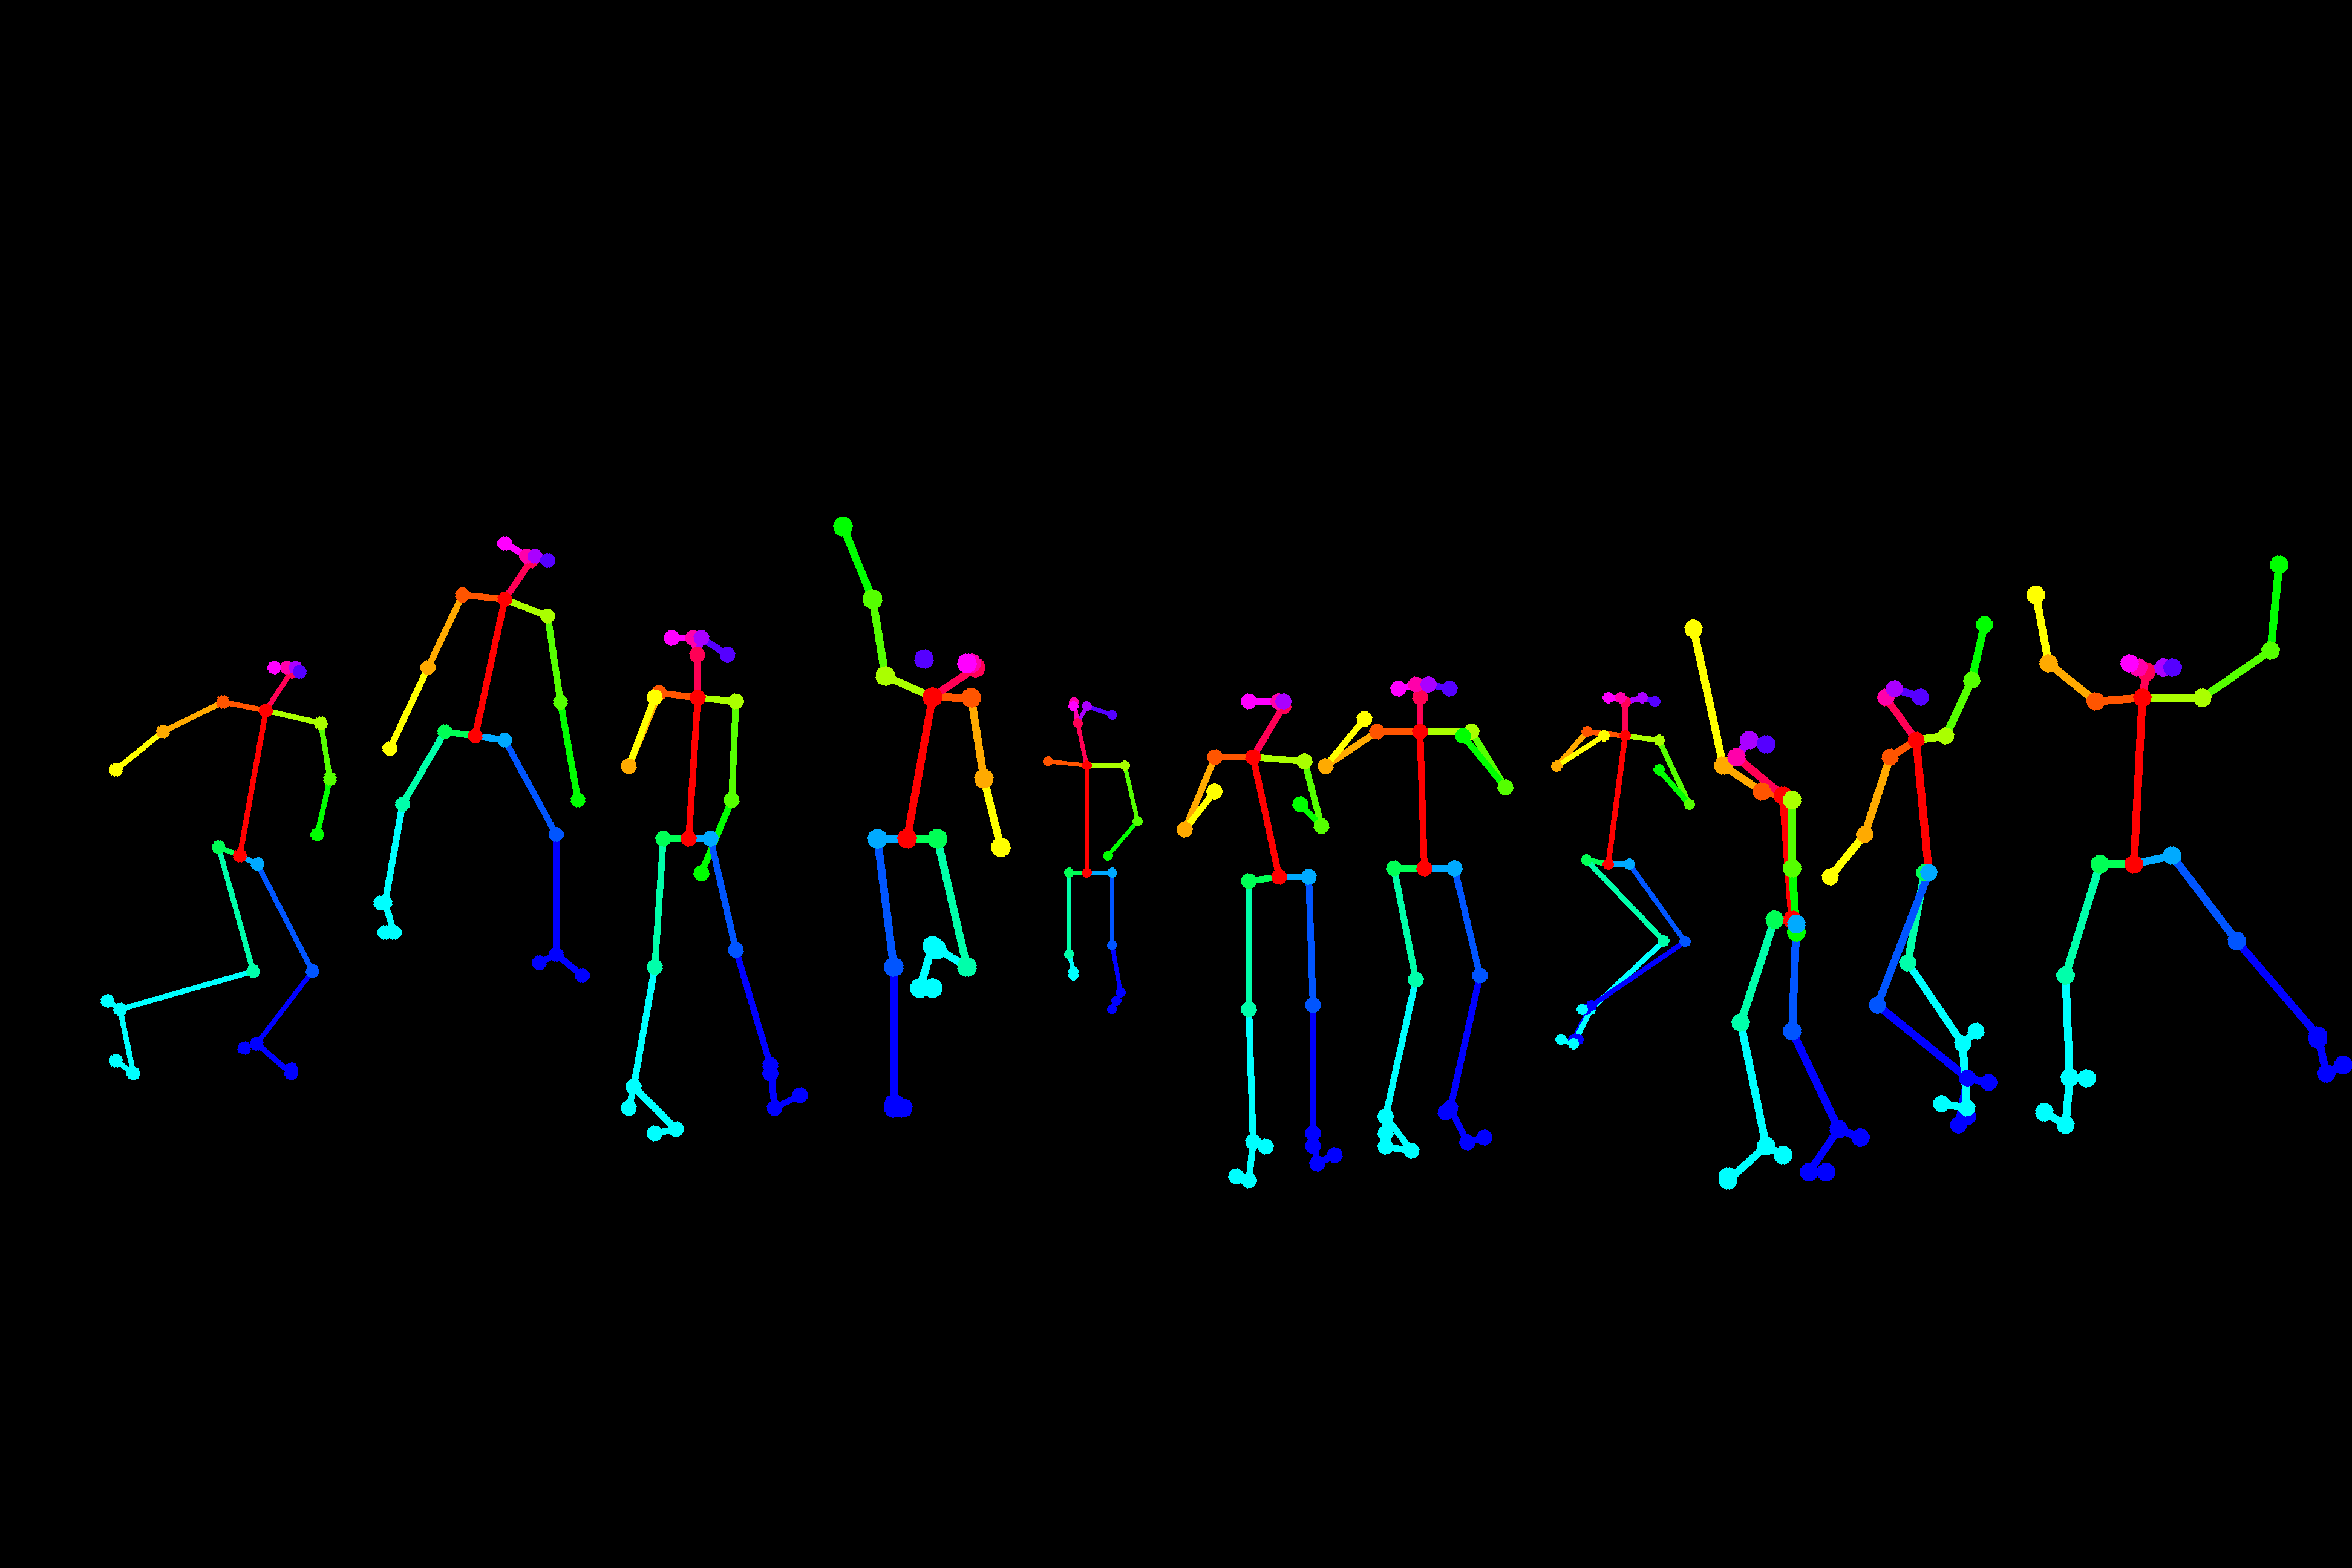

In [ ]:
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Asking for user input
ethnicities_list = ["kyrgyz", "maasai", "newar", "altai", "bengali", "haitian", "hazara", "kiche", "lahu",
                    "mizrahi", "quechua", "xhosa", "cree", "sami", "inuit", "walpiri", "maori", "basque",
                    "mazigh", "najdi","kalash"]
lora_dictionary={"kyrgyz":"kyrgyz.safetensors", "maasai":"Masaai test Lora.safetensors", "newar":"Newar.safetensors", "altai":0, "bengali":0, "haitian":"Haitian.safetensors", "hazara":"Hazara.safetensors", "kiche":0, "lahu":"last.safetensors",
                    "mizrahi":0, "quechua":0, "xhosa":"Xhosa.safetensors", "cree":0, "sami":"Sami.safetensors", "inuit":0, "walpiri":0, "maori":"Maori.safetensors", "basque":0,
                    "mazigh":0, "najdi":0,"kalash":"Kalash_women_cluster2.safetensors"}
user_prompt = input("Please enter your text prompt: ")
#prompts= user_prompt
updated_sentences=[]
lora_list=[]
# Process the text
doc = nlp(user_prompt)
def is_passive(sentence):
    doc = nlp(sentence)
    passive = False
    for token in doc:
        # Check if there's a token that is a passive subject
        if token.dep_ == 'nsubjpass':
            passive = True
    return passive
def process_text(text):
    doc = nlp(text)
    updated_sentences = []
    for sent in doc.sents:
        print(f"Sentence: {sent.text}")
        if is_passive(sent.text):
          updated_sentence = passive_to_active(sent.text)
          updated_sentences.append(updated_sentence)
        else:
          updated_sentence = sent.text
          updated_sentences.append(updated_sentence)
        for token in sent:
          if str(token).lower() in ethnicities_list:
              print(token)
              lora_list.append(token)
    updated_doc = nlp(" ".join(updated_sentences))

    return updated_doc
# POS tagging and identifying subjects, verbs, and objects
processed_doc = process_text(user_prompt)
for sent in processed_doc.sents:
    print(f"Sentence: {sent.text}")
    subjects, verbs, objects = [], [], []
    for token in sent:
        print(f"{token.text:10} {token.pos_:10}")

        if "subj" in token.dep_:
            subjects.append(token.text)
        if token.pos_ == "VERB":
            verbs.append(token.text)

        if "obj" in token.dep_:
            objects.append(token.text)
import requests
import json

# Replace 'Your_API_Key' with your actual Pixabay API key
API_KEY = '42825189-659d2e470c25fe20af6678a1c'
SEARCH_TERM = 'person '+verbs[0]

def search_pixabay_images(query, api_key, per_page=5):
    url = f"https://pixabay.com/api/?key={api_key}&q={query}&image_type=photo&per_page={per_page}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Search for images
result = search_pixabay_images(SEARCH_TERM, API_KEY)

# Print results
if result:
    for image in result.get('hits', []):
        print(image['webformatURL'])
else:
    print("No results found or error in request")
import requests
import os

def download_and_save_image(url, folder_path, image_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(folder_path, image_name), 'wb') as file:
            file.write(response.content)
    else:
        print(f"Failed to download {url}")

# Define the folder path in Google Drive
drive_folder_path = '/content/drive/MyDrive/ControlNetImages'  # Change to your path
os.makedirs(drive_folder_path, exist_ok=True)

# Download and save each image
if result:
    for index, image in enumerate(result.get('hits', [])):
        image_url = image['webformatURL']
        image_name = f"image_{index}.jpg"  # Image names like image_0.jpg, image_1.jpg, etc.
        download_and_save_image(image_url, drive_folder_path, image_name)
else:
    print("No results found or error in request")
import requests
import os

def get_pexels_images(api_key, query, per_page=10):
    headers = {'Authorization': api_key}
    params = {'query': query, 'per_page': per_page}
    response = requests.get('https://api.pexels.com/v1/search', headers=headers, params=params)
    return response.json()

def download_image(url, folder="/content/drive/MyDrive/ControlNetImages"):
    if not os.path.exists(folder):
        os.makedirs(folder)

    response = requests.get(url)
    if response.status_code == 200:
        file_path = os.path.join(folder, url.split('/')[-1])
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_path}")

# Replace with your actual Pexels API key
API_KEY = 'JyAPn2giACsepLq3R7pmTli4WAJEPJtCQgAihHLzFAmAmAvnTwbelVvV'
SEARCH_QUERY = 'person '+ verbs[0]

images_data = get_pexels_images(API_KEY, SEARCH_QUERY)

for photo in images_data['photos']:
    download_image(photo['src']['original'])
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source path (Google Drive folder you want to copy) and the destination path (new folder in /content)
source_folder = '/content/drive/MyDrive/ControlNetImages'  # Adjust this path
destination_folder = '/content/Output'  # Adjust this folder name as needed

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the entire folder from Google Drive to the new folder in /content
for item in os.listdir(source_folder):
    s = os.path.join(source_folder, item)
    d = os.path.join(destination_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)

print(f"Folder '{source_folder}' has been copied to '{destination_folder}'")
import os
from IPython.display import Image as IPImage

# Define the path to the folder containing your images
images_folder = "/content/Output"  # Update this to your images folder path

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Define the output folder for JSON and rendered images
output_folder = "/content/Final"
os.makedirs(output_folder, exist_ok=True)  # Create output directory if it doesn't exist

# Run OpenPose on the images in the specified folder
!cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir {images_folder} --write_json {output_folder} --display 0 --write_images {output_folder}

# If you want to display an example of the output, specify one of the output files
# This is optional and just for demonstration purposes
import os
import json
import shutil

input_folder = '/content/Final'  # Change this to your OpenPose output folder path
best_image_folder = '/content'  # Change this to your desired output path for the best image
os.makedirs(best_image_folder, exist_ok=True)

def score_image(json_path):
    """Scores an image based on keypoints and their confidence scores."""
    with open(json_path, 'r') as f:
        data = json.load(f)

    score = 0
    for person in data['people']:
        keypoints = person['pose_keypoints_2d']
        confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
        score += sum(confidence_scores)  # Sum of confidence scores as the score
    return score

# Scoring images
scores = {}
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        json_path = os.path.join(input_folder, filename)
        scores[filename] = score_image(json_path)

# Identifying the best-scored image
best_image_json = max(scores, key=scores.get)
best_image_base = os.path.splitext(best_image_json)[0]

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Saving the best image in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
import os
import json
import shutil

input_folder = '/content/Final'  # Change this to your OpenPose output folder path
best_image_folder = '/content'  # Change this to your desired output path for the best image
os.makedirs(best_image_folder, exist_ok=True)

def score_image(json_path):
    """Scores an image based on keypoints and their confidence scores."""
    with open(json_path, 'r') as f:
        data = json.load(f)

    score = 0
    for person in data['people']:
        keypoints = person['pose_keypoints_2d']
        confidence_scores = keypoints[2::3]  # Extracting every third item as confidence score
        score += sum(confidence_scores)  # Sum of confidence scores as the score
    return score

# Scoring images
scores = {}
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        json_path = os.path.join(input_folder, filename)
        scores[filename] = score_image(json_path)

# Identifying the best-scored image
best_image_json = max(scores, key=scores.get)
best_image_base = os.path.splitext(best_image_json)[0]

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Saving the best image in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, os.path.basename(best_image_path)))

print(f"Best image '{os.path.basename(best_image_path)}' saved in '{best_image_folder}'")
import os
import shutil

# Let's assume input_folder, best_image_base, and best_image_folder are defined earlier in your code

# Directly replacing "_keypoints.png" with "_rendered.png" in the best_image_base string
best_image_path = os.path.join(input_folder, best_image_base.replace('_keypoints', '_rendered.png'))

# Specify the new name for the file here
new_filename = "new_best_image.png"

# Saving the best image with the new name in the specified folder
shutil.copy(best_image_path, os.path.join(best_image_folder, new_filename))

print(f"Best image '{new_filename}' saved in '{best_image_folder}'")
import os
from google.colab import files
from IPython.display import Image as IPImage

# Upload an image (or use a pre-existing one)
#uploaded = files.upload()
image_path = "/content/new_best_image.png"  # Get the name of the uploaded image

# Ensure OpenPose binaries are executable
!chmod +x /content/openpose/build/examples/openpose/openpose.bin

# Run OpenPose on the uploaded image
# Adjust the parameters as needed
output_folder = "/content/drive/MyDrive/ControlNetImages2"
os.makedirs(output_folder, exist_ok=True)  # Create output directory
!cd /content/openpose && ./build/examples/openpose/openpose.bin \
    --image_dir /content/ \
    --render_pose 1 \
    --disable_blending \
    --display 0 \
    --write_images {output_folder} \
    --write_json {output_folder}

# Display the output
output_image = os.path.join(output_folder, os.path.basename("new_best_image_rendered.png"))
